# **Examining the Relationship of GDP on Life Expectancy: A Global Perspective**
____








# **Introduction**
In this project, the obtained dataset comprises variables such as `country`, `country_code`, `GDP`, `life_exp`, and `continent`. The primary objective is to examine the relationship between Life Expectancy, GDP, and Continent via Linear Regression. The following delineates the process of analysis.

# **TL; DR**


*   We can observe that the higher GDP then higher Life Expectancy. There is also significant difference between Africa (baseline) and other continents such as Europe, Asia, Oceania, and Americas.
*   According to P-value and Confidence Interval on the regression coefficients, the Parallel model with log-transformed GDP is selected as the most suitable model to explain relationship between Life Expectancy, GDP, and Continent. There is no need to have different slope for different continents. The residuals from this model have zero mean and constant variance, and also normally distributed.
*  Furthermore, the parallel model also outperforms both the interaction and simple models in terms of AIC and BIC.


# **Import Packages**

In [ ]:
# Import Packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols
from scipy import stats

# **Import Dataset**

In [ ]:
from google.colab import drive

drive.mount('/content/drive') # Mount Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import Dataset

df = pd.read_csv("/content/drive/MyDrive/University of Glasgow/Group_06_Data.csv", index_col=[0])

In [ ]:
# Check if the dataset is imported successfully or not

df.head() # display the first five rows

,country,country_code,GDP,life_exp,continent
1,Afghanistan,AFG,1516.3057,61.9824,Asia
2,Albania,ALB,14518.9060,76.4626,Europe
3,Algeria,DZA,11039.8060,76.3767,Africa
4,Angola,AGO,5908.5700,61.6434,Africa
5,Antigua and Barbuda,ATG,19124.4300,78.4968,Americas


In [ ]:
# Checking the type of variables

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    189 non-null    int64  
 1   country       189 non-null    object 
 2   country_code  189 non-null    object 
 3   GDP           189 non-null    float64
 4   life_exp      189 non-null    float64
 5   continent     189 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 9.0+ KB


# **Feature Engineering**

According to EDA results, variable "GDP" is found to be skewed. Moreover, in practice, Linear Regression is more suitable to describe a linear relationship between response and independent variables. In this analysis, Log transformation is performed to GDP in order to fix the non-linearity.

In [ ]:
# Log transformation for GDP

df['log_GDP'] = np.log(df['GDP'])

# **Formal Analysis**

Subsequently, we attempt to construct linear regression models, comprising interaction and parallel multiple models as well as the simple model. These models are performed on log-transformed GDP. Through invesgation on beta coefficients and comparison between model performance, we aim to identify the most fitting linear regression model.

## Interaction Model (After Log Transformation)

### Fitting the model

*   Life expectancy as the outcome variable (`life_exp`)
*   The log of GDP as the continuous explanatory variable (`log_GDP`)
*   Continent as the categorical explanatory variable (`continent`)

In [ ]:
model_interaction_log = ols("life_exp ~ log_GDP * continent", # build the interaction regression lines model
                            data=df)                          # DataFrame name

result_interaction_log = model_interaction_log.fit()          # fit the model

print(result_interaction_log.summary())                       # show the regression results

                            OLS Regression Results                            
Dep. Variable:               life_exp   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     65.18
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           8.25e-52
Time:                        12:30:52   Log-Likelihood:                -515.64
No. Observations:                 189   AIC:                             1051.
Df Residuals:                     179   BIC:                             1084.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

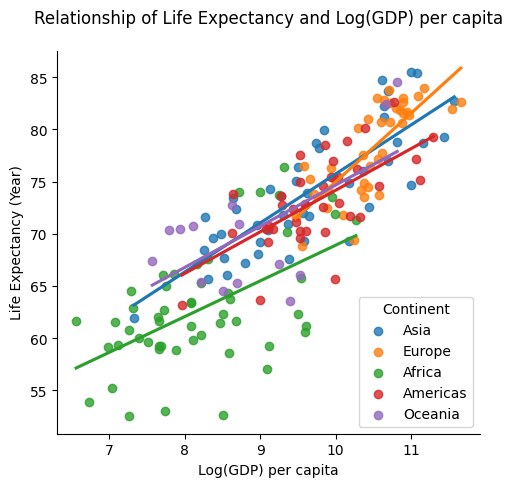

In [ ]:
# Visualization of Regression Lines

sp = sns.lmplot(data = df,        # DataFrame name
                x = 'log_GDP',    # continuous explanatory variable (log of GDP)
                y = 'life_exp',   # outcome variable (Life Expectancy)
                hue='continent',  # produce points with different colors by categorical explanatory variable (continent)
                fit_reg = True,   # estimate and plot a regression model relating the x and y variables
                ci = False,       # turn off the confidence interval for the regression estimate
                legend = False)   # turn off the legend

sp.set(xlabel='Log(GDP) per capita',     # adding label on the x-axis
       ylabel='Life Expectancy (Year)')  # adding label on the y-axis

plt.title("Relationship of Life Expectancy and Log(GDP) per capita", y=1.05)   # adding title
plt.legend(title="Continent", loc="lower right")                               # customizing the legend position

sp.fig.tight_layout()   # avoid the overlapping text
plt.show()              # show the scatter plot

$$
life\_exp_i = \alpha + \beta_{log\_GDP} \cdot {log\_GDP}_i + \beta_{\text{Americas}} \cdot \mathbb{I}_{\text{Americas}}(i) + \beta_{\text{Asia}} \cdot \mathbb{I}_{\text{Asia}}(i) + \beta_{\text{Europe}} \cdot \mathbb{I}_{\text{Europe}}(i) + \beta_{\text{Oceania}} \cdot \mathbb{I}_{\text{Oceania}}(i) + \beta_{log\_GDP,Americas} \cdot {log\_GDP}_i \cdot \mathbb{I}_{\text{Americas}}(i) + \beta_{log\_GDP,Asia} \cdot {log\_GDP}_i \cdot \mathbb{I}_{\text{Asia}}(i) + \beta_{log\_GDP,Europe} \cdot {log\_GDP}_i \cdot \mathbb{I}_{\text{Europe}}(i) + \beta_{log\_GDP,Oceania} \cdot {log\_GDP}_i \cdot \mathbb{I}_{\text{Oceania}}(i)
$$

where

$$
\mathbb{I}_{\text{continent}}(i) = \left\{
                \begin{array}{ll}
                  1 & \text{if country i is in the continent}, \\
                  0 & \text{Otherwise}.
                \end{array}
              \right.
$$

$$ $$

In this case, Africa is the baseline. Hence, the regression lines for each continet are:
*   Africa:
$$
\widehat{life\_exp} = 34.7329 + 3.4185 \cdot {log\_GDP}
$$
*   America:
$$
\widehat{life\_exp} = 34.3593 + 3.9823 \cdot {log\_GDP}
$$
*   Asia:
$$
\widehat{life\_exp} = 28.8016 + 4.6943 \cdot {log\_GDP}
$$
*   Europe:
$$
\widehat{life\_exp} = 9.3102 + 6.5679 \cdot {log\_GDP}
$$
*   Oceania:
$$
\widehat{life\_exp} = 35.2474 + 3.9431 \cdot {log\_GDP}
$$

$$ $$


Here, we can see that, although the intercept for Africa may be lower than other continents, the associated average increase in life expectancy with  every unit increase in log_GDP (3.42) is not as severe as Europe (6.57). The slopes for Asia (4.70), Oceania (3.94) and Americas (3.98) are more similar to the slopes in Africa.

The intercept for Africa in this model is 34.73, indicating that when log_GDP and the categorical variable coefficients are zero, the life expectancy for Africa is 34.73. Europe has the smallest intercept (9.31), but it also has the largest slope (6.57) and higher log_GDP in general, which gives Europe a noticeable different regression line than others. The largest intercept is Oceania (35.24), but the fact that it has a similar slope to Africa makes Oceania's regression line look like the African regression line after an upward translation.


### Assessing Model Fit

There are five assumptions to validate if the model is a appropriate fit for the data.
* The residuals have mean zero.
* The residuals have constant variance.
* The residuals are normally distributed.
* The residuals are independent.
* The explanatory variables are not recorded with error.

In the following analysis, the first three assumptions are verified for validity.

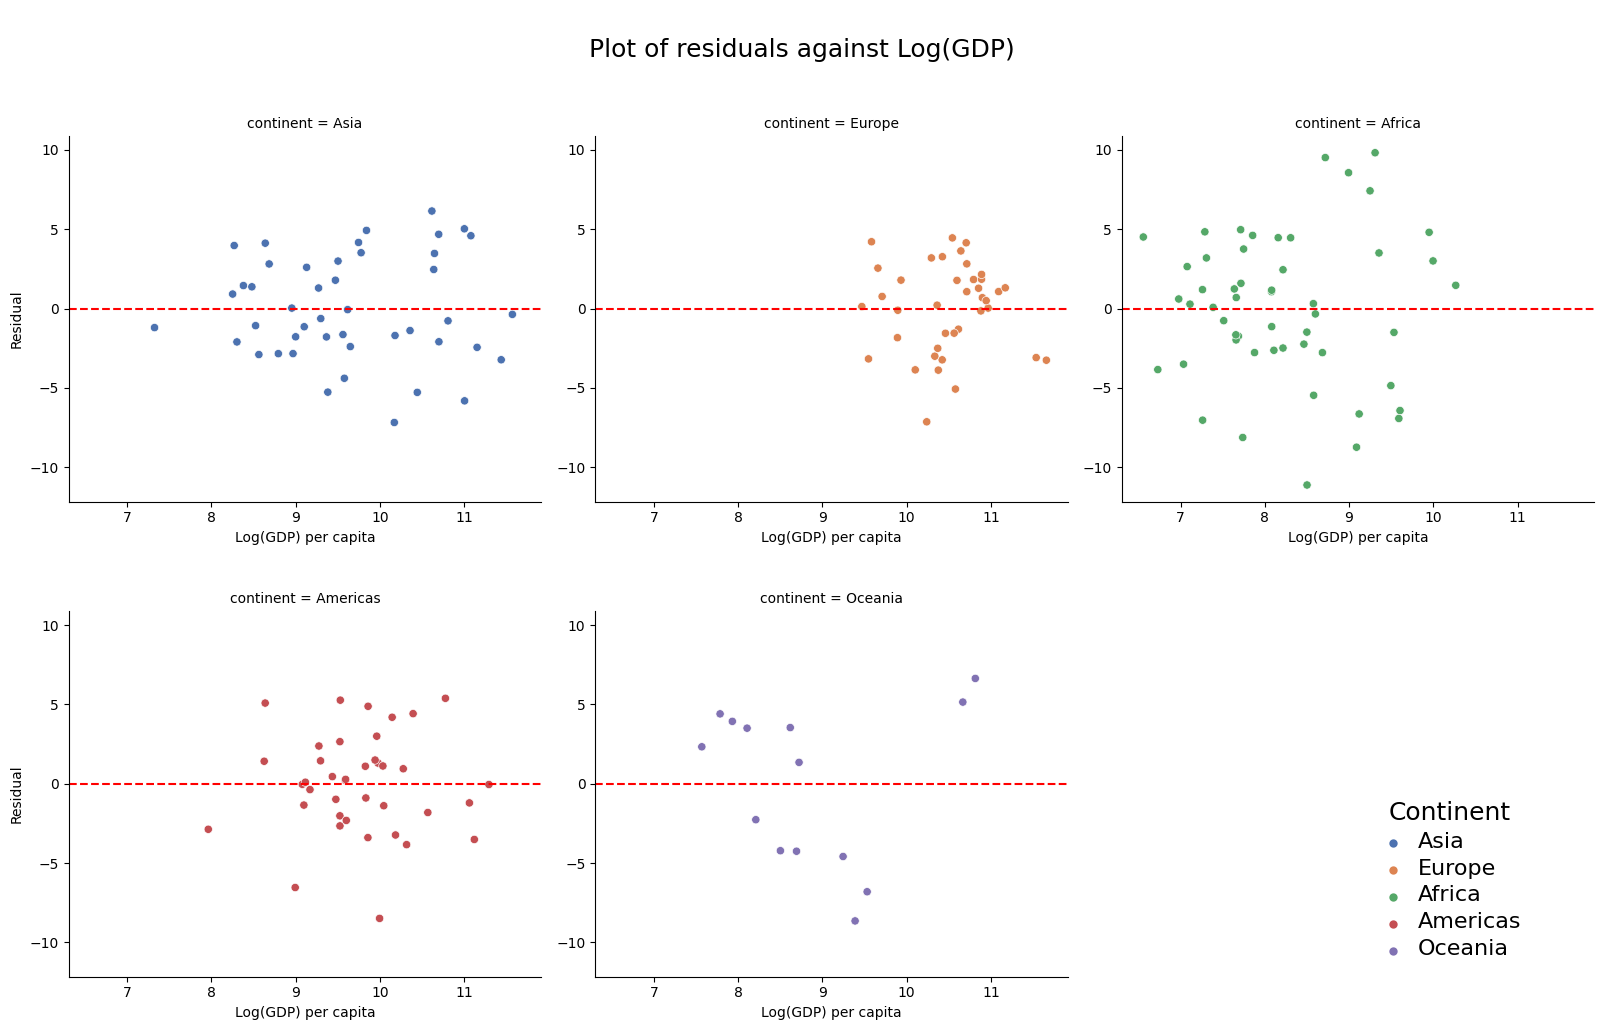

In [ ]:
# Validate if the residuals have zero mean and constant variance or not

# Plots of residuals against GDP
sp = sns.relplot(x = df['log_GDP'],                 # continuous explanatory variable (GDP)
                 y = result_interaction_log.resid,  # residuals
                 hue = df["continent"],             # produce points with different colors by categorical explanatory variable (continent)
                 col = df["continent"],             # define subsets to plot on different continents
                 col_wrap = 3,                      # “Wrap” the column variable by width of 2, so that the column facets span multiple rows
                 palette = 'deep')                  # set the color to use for different levels

sp.set(xlabel='Log(GDP) per capita',  # adding label on the x-axis
       ylabel='Residual')             # adding label on the y-axis

# Customize the legend
sp.legend.set_title("Continent")            # adjust legend title
sp.legend.set_bbox_to_anchor([0.95, 0.15])  # adjust the legend position
sp.legend.get_title().set_fontsize(18)      # adjust the font size for the legend title
for text in sp.legend.texts:                # adjust the font size for the legend's list
  text.set_fontsize(16)

#Adding horizontal line at y= 0
for ax in sp.axes.flat:
    ax.axhline(y=0, ls="--", color="red")             # horizontal line
    ax.set_xlabel(ax.get_xlabel(), visible=True)      # show x-axis title
    # ax.set_ylabel(ax.get_ylabel(), visible=True)
    ax.tick_params(labelbottom=True, labelleft=True)  # show x-axis number

# Adding a single title
plt.suptitle("\nPlot of residuals against Log(GDP)", y=1.025, fontsize=18)

sp.fig.tight_layout()             # avoid the overlapping text
plt.subplots_adjust(hspace=0.3)   # adjust space between plots
plt.show()                        # show the residuals plot

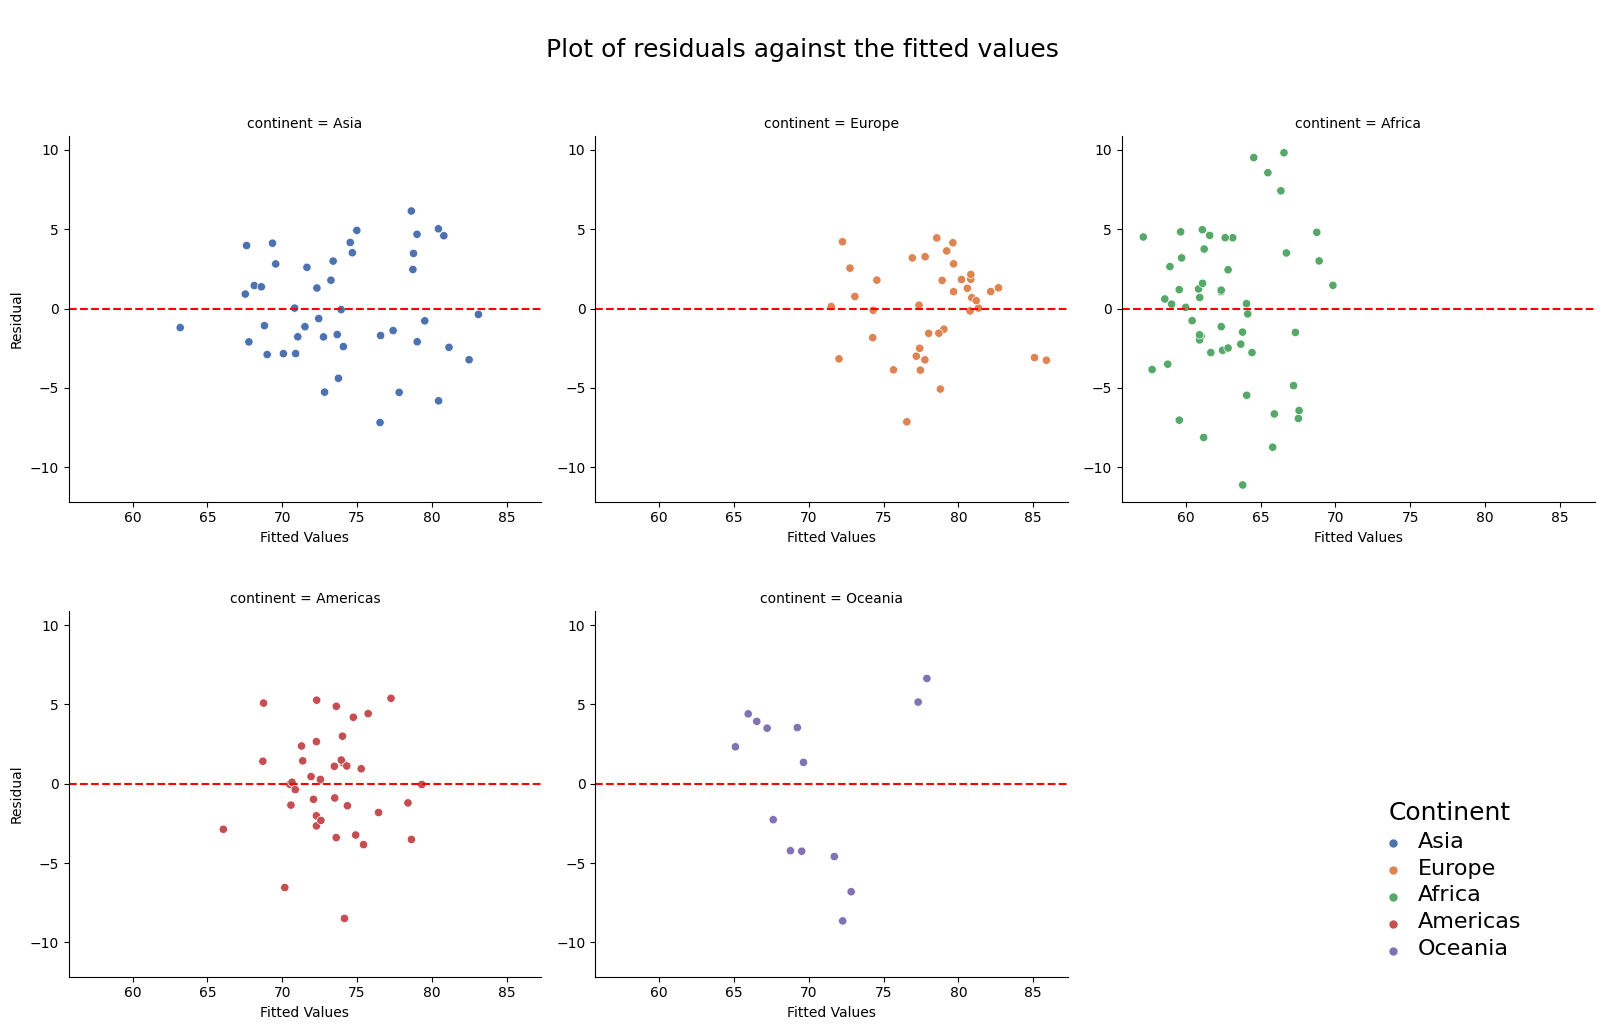

In [ ]:
# Validate if the residuals have zero mean and constant variance or not

# Plots of residuals against fitted values
sp = sns.relplot(x = result_interaction_log.fittedvalues,  # fitted values
                 y = result_interaction_log.resid,         # residuals
                 hue = df["continent"],                    # produce points with different colors by categorical explanatory variable (continent)
                 col = df["continent"],                    # define subsets to plot on different continents
                 col_wrap = 3,                             # “Wrap” the column variable by width of 2, so that the column facets span multiple rows
                 palette = 'deep')                         # set the color to use for different levels

sp.set(xlabel='Fitted Values', # adding label on the x-axis
       ylabel='Residual')      # adding label on the y-axis

# Customize the legend
sp.legend.set_title("Continent")            # adjust legend title
sp.legend.set_bbox_to_anchor([0.95, 0.15])  # adjust the legend position
sp.legend.get_title().set_fontsize(18)      # adjust the font size for the legend title
for text in sp.legend.texts:                # adjust the font size for the legend's list
  text.set_fontsize(16)

#Adding horizontal line at y= 0
for ax in sp.axes.flat:
    ax.axhline(y=0, ls="--", color="red")             # horizontal line
    ax.set_xlabel(ax.get_xlabel(), visible=True)      # show x-axis title
    # ax.set_ylabel(ax.get_ylabel(), visible=True)
    ax.tick_params(labelbottom=True, labelleft=True)  # show x-axis number

# Adding a single title
plt.suptitle("\nPlot of residuals against the fitted values", y=1.025, fontsize=18)

sp.fig.tight_layout()             # avoid the overlapping text
plt.subplots_adjust(hspace=0.3)   # adjust space between plots
plt.show()                        # show the residuals plot

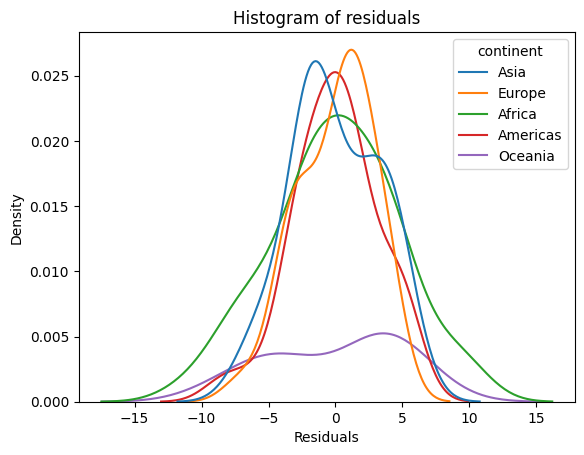

In [ ]:
# Validate if the residuals are normally distributed or not

# Plot KDE of the residuals grouped by continent
sp=sns.kdeplot(x=result_interaction_log.resid, # residuals
               hue=df["continent"])            # produce points with different colors by categorical explanatory variable (continent

sp.set(xlabel='Residuals',              # adding label on the x-axis
       title='Histogram of residuals')  # adding title

plt.show() # show histograms of the residuals

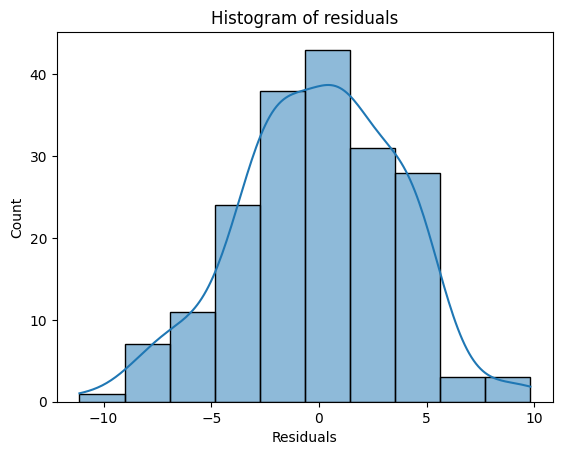

In [ ]:
# Validate if the residuals are normally distributed or not

# Plot histograms of the residuals
sp=sns.histplot(x=result_interaction_log.resid,  # residuals
                bins=10,                         # set the number of bins as 10
                kde=True)                        # compute a kernel density estimate to smooth the distribution and display it on the plot

sp.set(xlabel='Residuals',              # adding label on the x-axis
       title='Histogram of residuals')  # adding title

plt.show()  # show histograms of the residuals


* Residuals mean and variance

From the scatter plot of residuals from the Interaction Model (After Log Transformation), it can be observed that the residuals are randomly scattered and exhibit no systematic pattern. Additionally, from the plot of the residuals against the fitted values, it shows the majority of residuals maintain constant variance across all levels of the fitted values, indicating homoscedasticity. However, there are a few outliers present (i.e., Oceania, Americas).

* Residuals distribution

Examining the histogram of residuals for each continent reveals that residuals for the Americas and Africa follow a roughly normal distribution. The distribution for Asia is slightly right-skewed, while Europe and Oceania show a slight left-skew. Nonetheless, the overall histogram of residuals displays a roughly bell-shaped curve centered around zero, suggesting that the residuals have an average value of zero and are approximately normally distributed.

### Model Inferences - Variable Selection

Regression Coefficient: P-values & Confidence Interval

In [ ]:
# Creating regression result tables

# converting the result to be html table
regression_table_html = result_interaction_log.summary().tables[1].as_html()

# read the html table and rename columns
regression_table_html = pd.read_html(regression_table_html, header=0, index_col=0)[0]
regression_table_html = regression_table_html.rename(columns={"[0.025": "0.025",
                                                              "0.975]": "0.975"})

In [ ]:
display(regression_table_html)

,coef,std err,t,P>|t|,0.025,0.975
Intercept,34.7329,4.843,7.172,0.000,25.177,44.289
continent[T.Americas],-0.3736,9.974,-0.037,0.970,-20.055,19.308
continent[T.Asia],-5.9313,7.342,-0.808,0.420,-20.420,8.558
continent[T.Europe],-25.4227,13.420,-1.894,0.060,-51.905,1.060
continent[T.Oceania],0.5145,10.605,0.049,0.961,-20.413,21.442
log_GDP,3.4185,0.585,5.844,0.000,2.264,4.573
log_GDP:continent[T.Americas],0.5638,1.066,0.529,0.598,-1.540,2.668
log_GDP:continent[T.Asia],1.2758,0.816,1.563,0.120,-0.335,2.887
log_GDP:continent[T.Europe],3.1494,1.327,2.373,0.019,0.531,5.768
log_GDP:continent[T.Oceania],0.5246,1.211,0.433,0.665,-1.866,2.915


Upon examination of the P-values and confidence intervals, it is observed that the P-values for most of regression coefficients exceed the 5% confidence level, and their confidence intervals include 0. Consequently, there is insufficient evidence to assert the statistical significance of those regression coefficients. There are only log_GDP and intercept coefficients are significant.

In this case, we learn that having different slopes for each continent is not required. Moreover, then analysis on the parallel model will be performed in the next section.

## Parallel Model (After Log Transformation)

### Fitting the model

*   Life expectancy as the outcome variable (`life_exp`)
*   The log of GDP as the continuous explanatory variable (`log_GDP`)
*   Continent as the categorical explanatory variable (`continent`)

In [ ]:
model_parallel_log = ols("life_exp ~ log_GDP + continent",  # build the parallel regression lines model
                         data=df)                           # DataFrame name

result_parallel_log = model_parallel_log.fit()              # fit the model

print(result_parallel_log.summary())                        # show the regression results

                            OLS Regression Results                            
Dep. Variable:               life_exp   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     114.4
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           2.17e-54
Time:                        12:31:05   Log-Likelihood:                -519.06
No. Observations:                 189   AIC:                             1050.
Df Residuals:                     183   BIC:                             1070.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                27.92

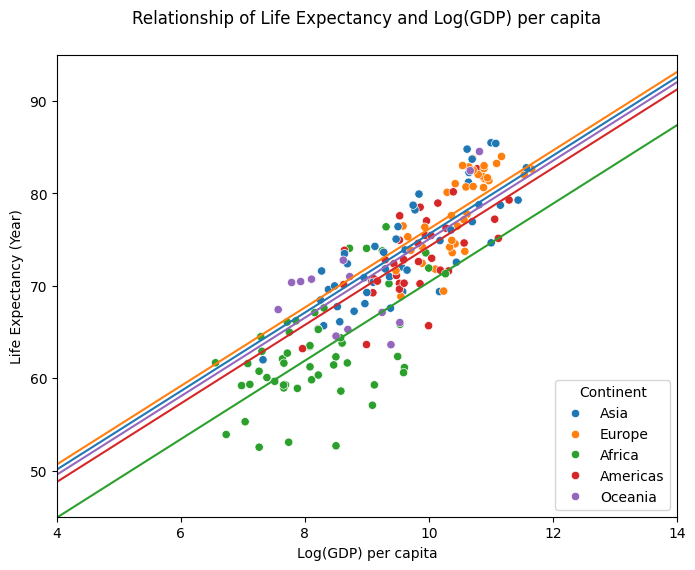

In [ ]:
# Visualization of Regression Lines

sl = result_parallel_log.params

# Intercept and Slope for each continent
africa_intercept = sl["Intercept"]
americas_intercept = sl["Intercept"] + sl["continent[T.Americas]"]
asia_intercept = sl["Intercept"] + sl["continent[T.Asia]"]
europe_intercept = sl["Intercept"] + sl["continent[T.Europe]"]
oceania_intercept = sl["Intercept"] + sl["continent[T.Oceania]"]

plt.figure(figsize=(8, 6))

# Scatter plot
sp=sns.scatterplot(data = df,
                   x = 'log_GDP',   # continuous explanatory variable(log_GDP)
                   y = 'life_exp',  # outcome variable(life_exp)
                   hue='continent') # produce points with different colors by categorical explanatory variable(continent)

sp.set(xlabel='Log(GDP) per capita',    # adding label on the x-axis
       ylabel='Life Expectancy (Year)') # adding label on the y-axis

plt.title("Relationship of Life Expectancy and Log(GDP) per capita", y=1.05) # adding title
plt.legend(title="Continent", loc="lower right")                             # customizing the legend position

# Regression Line for each continent
plt.axline(xy1=(0,africa_intercept), slope=sl["log_GDP"], color="tab:green")
plt.axline(xy1=(0,americas_intercept), slope=sl["log_GDP"], color="tab:red")
plt.axline(xy1=(0,asia_intercept), slope=sl["log_GDP"], color="tab:blue")
plt.axline(xy1=(0,europe_intercept), slope=sl["log_GDP"], color="tab:orange")
plt.axline(xy1=(0,oceania_intercept), slope=sl["log_GDP"], color="tab:purple")

plt.ylim(45, 95)  # set the y-limits of the current axes
plt.xlim(4, 14)   # set the x-limits of the current axes

# saving the plot to be png
# plt.savefig('figure_regression_line.png')

plt.show()

$$
{life\_exp_i} = \alpha + \beta_{log\_GDP} \cdot {log\_GDP}_i + \beta_{Americas} \cdot \mathbb{I}_{Americas}(i) + \beta_{Asia} \cdot \mathbb{I}_{Asia}(i) + \beta_{Europe} \cdot \mathbb{I}_{Europe}(i) + \beta_{Oceania} \cdot \mathbb{I}_{Oceania}(i)
$$

where

$$
\mathbb{I}_{\text{continent}}(i) = \left\{
                \begin{array}{ll}
                  1 & \text{if country i is in the continent}, \\
                  0 & \text{Otherwise}.
                \end{array}
              \right.
$$

$$ $$

In this case, Africa is the baseline. Hence, the regression lines for each continent are:
*   Africa:
$$
\widehat{life\_exp} = 27.9228 + 4.2461 \cdot {log\_GDP}
$$
*   America:
$$
\widehat{life\_exp} = 31.7858 + 4.2461 \cdot {log\_GDP}
$$
*   Asia:
$$
\widehat{life\_exp} = 33.1232 + 4.2461 \cdot {log\_GDP}
$$
*   Europe:
$$
\widehat{life\_exp} = 33.6790 + 4.2461 \cdot {log\_GDP}
$$
*   Oceania:
$$
\widehat{life\_exp} = 32.5687 + 4.2461 \cdot {log\_GDP}
$$

$$ $$



From the plotted regression lines we observe a positive correlation between log_GDP and life expectancy for each continent. The intercept for this model is 27.92 for Africa, indicating that when log_GDP and the categorical variable coefficients are zero, the life expectancy is 27.92. While this situation is not practically meaningful. On average, an increase of one unit in log_GDP corresponds to an increase of 4.25 in life expectancy. The intercepts for each continent vary, with Africa as the baseline at 27.92, followed by an addition of 3.86 for the Americas, 5.20 for Asia, 5.76 for Europe, and 4.65 for Oceania. Consequently, we observe that Europe has the highest life expectancy, followed by Asia, Oceania, Americas, and Africa.

### Assessing Model Fit

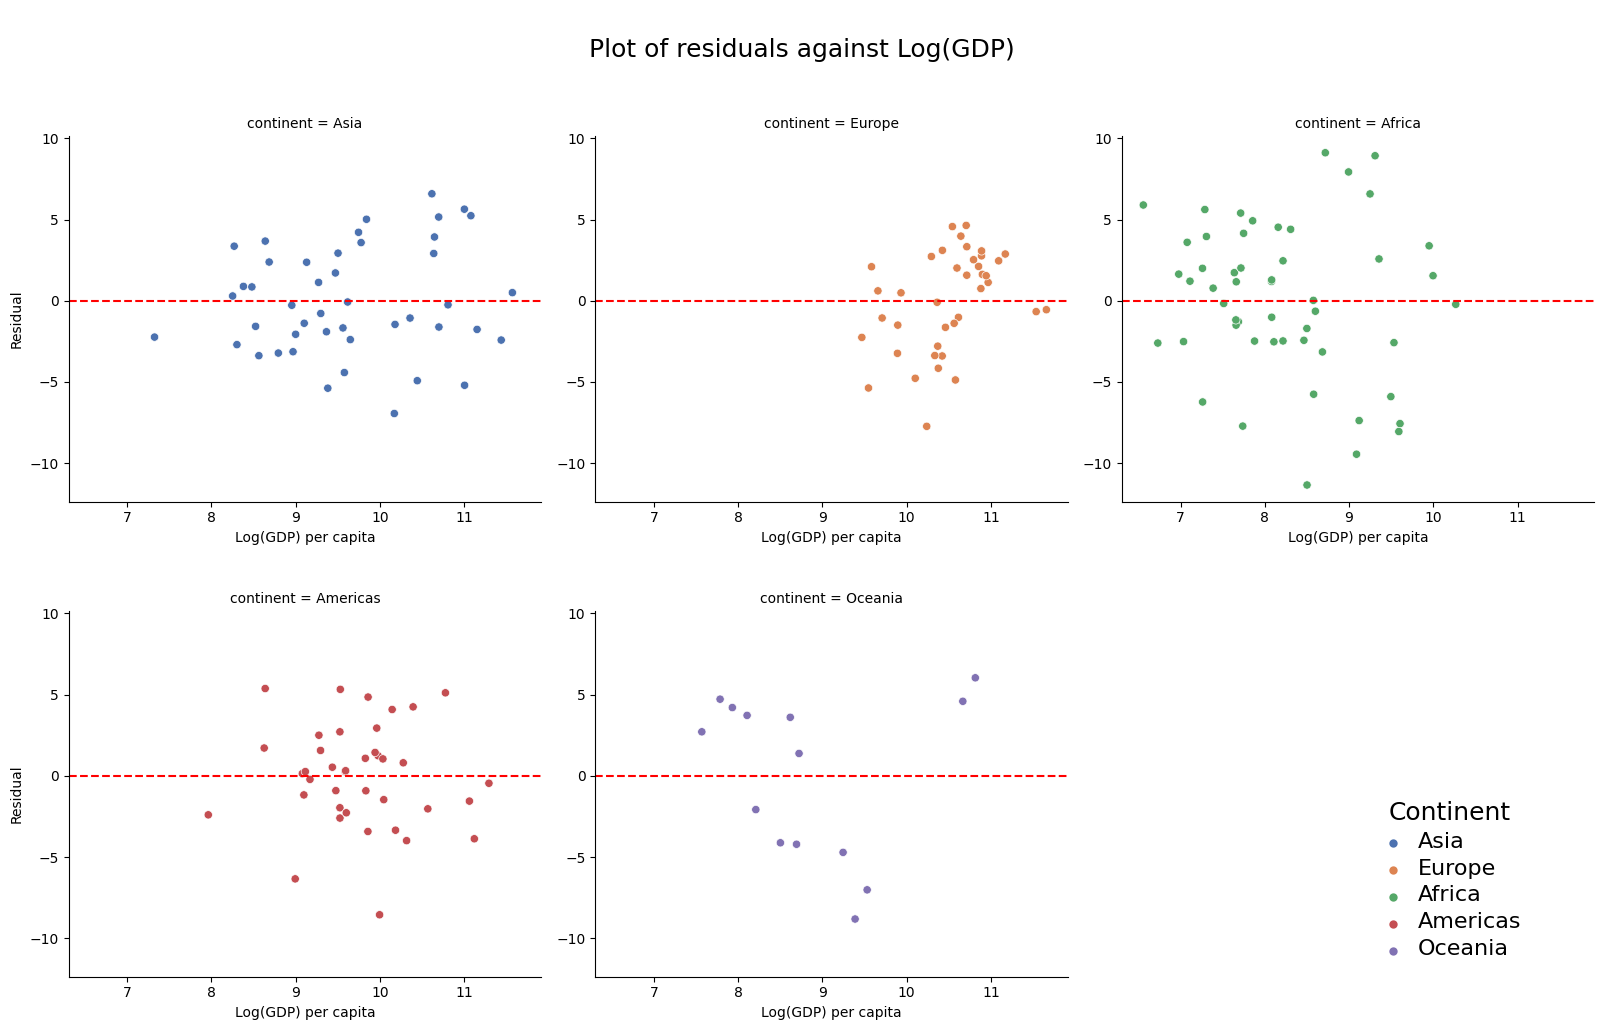

In [ ]:
# Validate if the residuals have zero mean and constant variance or not

# Plots of residuals against GDP
sp = sns.relplot(x = df['log_GDP'],                 # continuous explanatory variable (GDP)
                 y = result_parallel_log.resid,     # residuals
                 hue = df["continent"],             # produce points with different colors by categorical explanatory variable (continent)
                 col = df["continent"],             # define subsets to plot on different continents
                 col_wrap = 3,                      # “Wrap” the column variable by width of 2, so that the column facets span multiple rows
                 palette = 'deep')                  # set the color to use for different levels

sp.set(xlabel='Log(GDP) per capita',  # adding label on the x-axis
       ylabel='Residual')             # adding label on the y-axis

# Customize the legend
sp.legend.set_title("Continent")            # adjust legend title
sp.legend.set_bbox_to_anchor([0.95, 0.15])  # adjust the legend position
sp.legend.get_title().set_fontsize(18)      # adjust the font size for the legend title
for text in sp.legend.texts:                # adjust the font size for the legend's list
  text.set_fontsize(16)

#Adding horizontal line at y= 0
for ax in sp.axes.flat:
    ax.axhline(y=0, ls="--", color="red")             # horizontal line
    ax.set_xlabel(ax.get_xlabel(), visible=True)      # show x-axis title
    # ax.set_ylabel(ax.get_ylabel(), visible=True)
    ax.tick_params(labelbottom=True, labelleft=True)  # show x-axis number

# Adding a single title
plt.suptitle("\nPlot of residuals against Log(GDP)", y=1.025, fontsize=18)

sp.fig.tight_layout()             # avoid the overlapping text
plt.subplots_adjust(hspace=0.3)   # adjust space between plots

# saving the plot to be png
plt.savefig('figure_residual_1.png')

plt.show()          # show the residuals plot

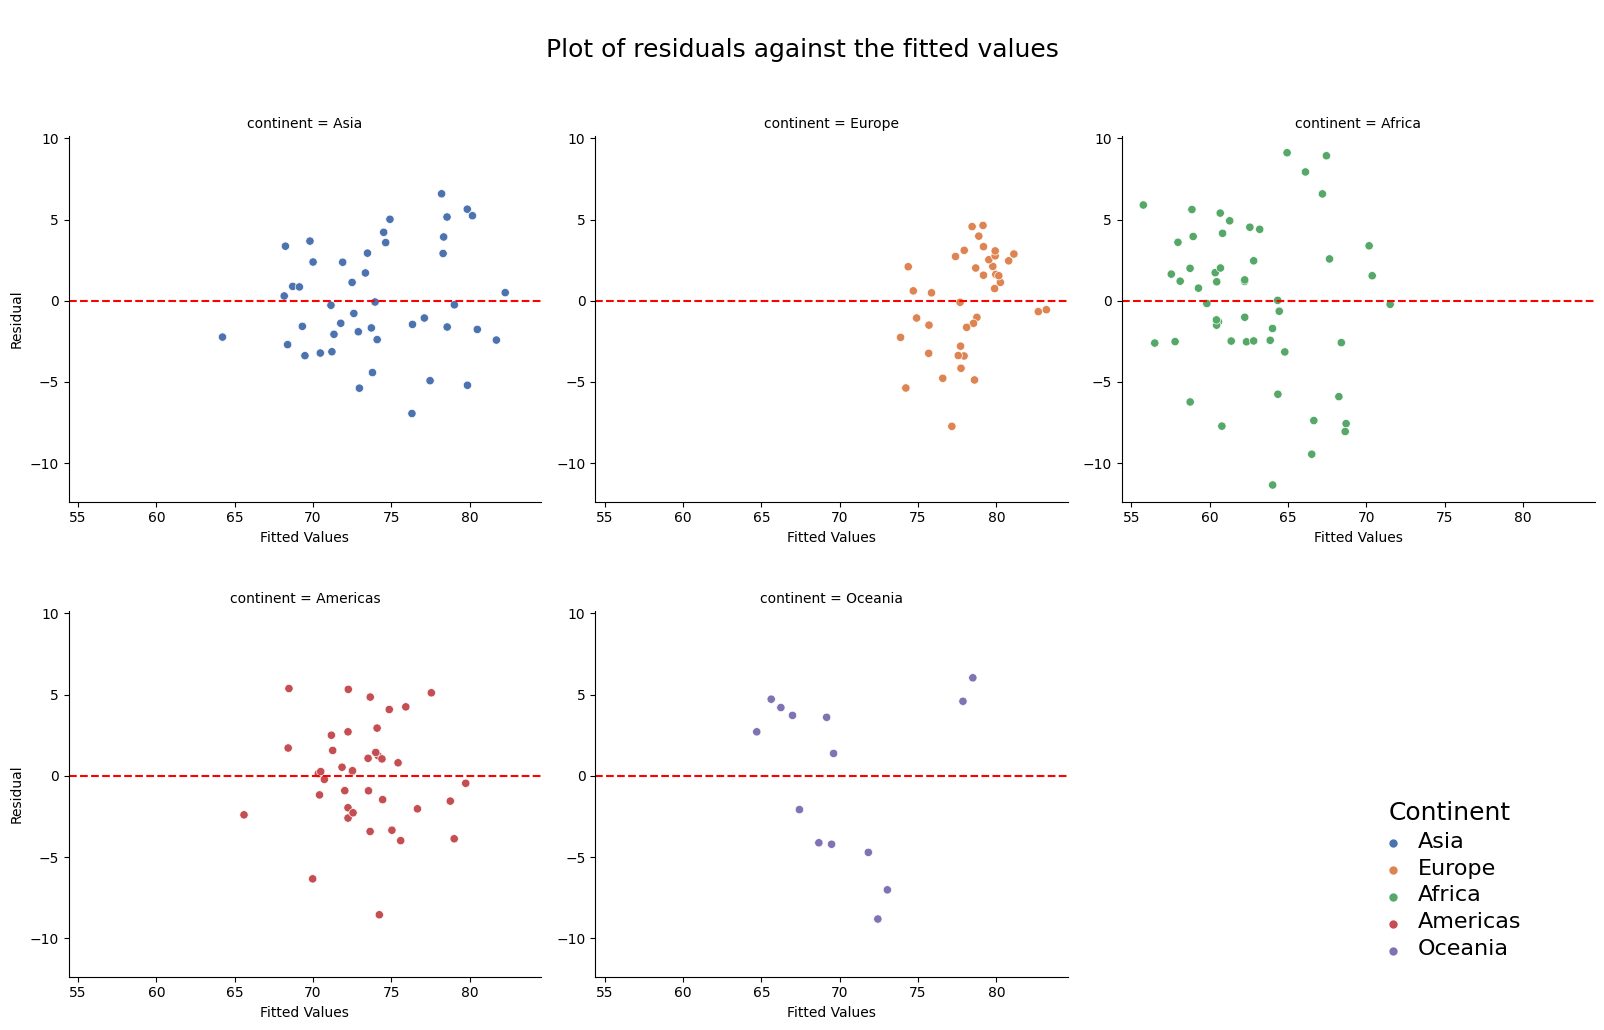

In [ ]:
# Validate if the residuals have zero mean and constant variance or not

# Plots of residuals against fitted values
sp = sns.relplot(x = result_parallel_log.fittedvalues,  # fitted values
                 y = result_parallel_log.resid,         # residuals
                 hue = df["continent"],                 # produce points with different colors by categorical explanatory variable (continent)
                 col = df["continent"],                 # define subsets to plot on different continents
                 col_wrap = 3,                          # “Wrap” the column variable by width of 2, so that the column facets span multiple rows
                 palette = 'deep')                      # set the color to use for different levels

sp.set(xlabel='Fitted Values', # adding label on the x-axis
       ylabel='Residual')      # adding label on the y-axis

# Customize the legend
sp.legend.set_title("Continent")            # adjust legend title
sp.legend.set_bbox_to_anchor([0.95, 0.15])  # adjust the legend position
sp.legend.get_title().set_fontsize(18)      # adjust the font size for the legend title
for text in sp.legend.texts:                # adjust the font size for the legend's list
  text.set_fontsize(16)

#Adding horizontal line at y= 0
for ax in sp.axes.flat:
    ax.axhline(y=0, ls="--", color="red")             # horizontal line
    ax.set_xlabel(ax.get_xlabel(), visible=True)      # show x-axis title
    # ax.set_ylabel(ax.get_ylabel(), visible=True)
    ax.tick_params(labelbottom=True, labelleft=True)  # show x-axis number

# Adding a single title
plt.suptitle("\nPlot of residuals against the fitted values", y=1.025, fontsize=18)

sp.fig.tight_layout()             # avoid the overlapping text
plt.subplots_adjust(hspace=0.3)   # adjust space between plots

# saving the plot to be png
plt.savefig('figure_residual_2.png')

plt.show()              # show the residuals plot

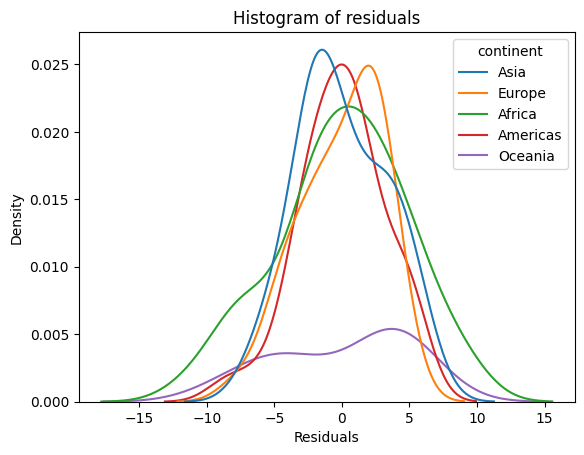

In [ ]:
# Validate if the residuals are normally distributed or not

# Plot KDE of the residuals grouped by continent

sp=sns.kdeplot(x=result_parallel_log.resid, # residuals
               hue=df["continent"])         # produce points with different colors by categorical explanatory variable (continent

sp.set(xlabel='Residuals',              # adding label on the x-axis
       title='Histogram of residuals')  # adding title

plt.show() # show histograms of the residuals

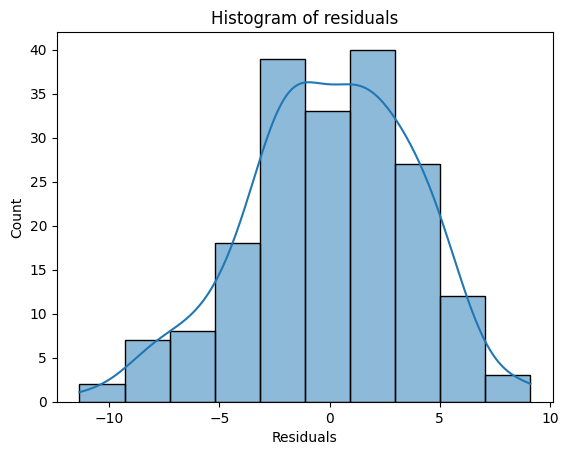

In [ ]:
# Validate if the residuals are normally distributed or not

# Plot histograms of the residuals

sp=sns.histplot(x=result_parallel_log.resid,  # residuals
                bins=10,                      # set the number of bins as 10
                kde=True)                     # compute a kernel density estimate to smooth the distribution and display it on the plot

sp.set(xlabel='Residuals',              # adding label on the x-axis
       title='Histogram of residuals')  # adding title

# saving the plot to be png
# plt.savefig('figure_residual_3.png')

plt.show()  # show histograms of the residuals

* Residuals mean and variance

The scatter plot of residuals from the Parallel Model (After Log Transformation) reveals that the residuals are randomly dispersed, showing no systematic patterns. Furthermore, from the plot of the residuals against the fitted values, it shows the majority of residuals exhibit constant variance across all levels of the fitted values. However, in Europe and Oceania, there are a few outliers on the right side of the plot, and in Asia and the Americas, there is an outlier on the bottom-left side.

* Residuals distribution

Analyzing the histograms of residuals for each continent, it is observed that residuals for the Americas and Africa follow a roughly normal distribution. Oceania and Europe, however, display a slight left-skew, while Asia shows a slight right-skew. Nonetheless, the overall histogram of residuals presents an approximately bell-shaped curve centered around zero. This suggests that the residuals have an average value of zero and are broadly distributed according to a normal distribution.

### Model Inferences - Variable Selection

Regression Coefficient: P-values & Confidence Interval

In [ ]:
# Creating regression result tables

# converting the result to be html table
regression_table_html = result_parallel_log.summary().tables[1].as_html()

# read the html table and rename columns
regression_table_html = pd.read_html(regression_table_html, header=0, index_col=0)[0]
regression_table_html = regression_table_html.rename(columns={"coef": "Coef",
                                                              "[0.025": "0.025",
                                                              "0.975]": "0.975"})

In [ ]:
display(regression_table_html)

,Coef,std err,t,P>|t|,0.025,0.975
Intercept,27.9228,2.835,9.851,0.0,22.330,33.515
continent[T.Americas],3.8631,0.962,4.014,0.0,1.964,5.762
continent[T.Asia],5.2004,0.915,5.682,0.0,3.395,7.006
continent[T.Europe],5.7562,1.117,5.154,0.0,3.553,7.960
continent[T.Oceania],4.6460,1.172,3.963,0.0,2.333,6.959
log_GDP,4.2461,0.338,12.549,0.0,3.579,4.914



Moreover, upon observation, it is noted that all P-values are less than the 5% significance level, and the confidence intervals for the regression coefficients do not encompass zero. Consequently, there is sufficient evidence to assert the statistical significance of the regression coefficients. The significance of the coefficients suggests that regression model with different intercepts but having the same slopes can capture the linear relationship between independent and dependent variables.

In the next section, we will do sanity check if the simple linear regression without continent as the categorical variable has a better performance or not.

## Simple Linear Regression (After Log Transformation)

### Fitting the model

*   Life Expectancy as the outcome variable (`life_exp`)
*   The log of GDP as the continuous explanatory variable (`log_GDP`)


In [ ]:
model_simple = ols("life_exp ~ log_GDP",  # build the simple linear regression model
                   data=df)               # DataFrame name

result_simple = model_simple.fit()        # fit the model

print(result_simple.summary())            # show the regression results

                            OLS Regression Results                            
Dep. Variable:               life_exp   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     447.2
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           1.77e-51
Time:                        12:31:22   Log-Likelihood:                -537.56
No. Observations:                 189   AIC:                             1079.
Df Residuals:                     187   BIC:                             1086.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.7013      2.462      8.001      0.0

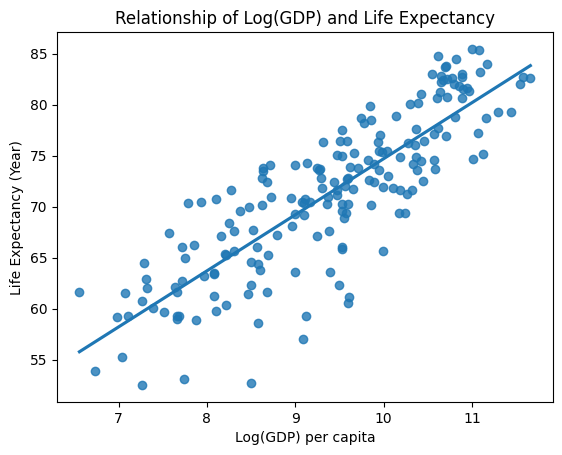

In [ ]:
# Visualization of Regression Lines

sp = sns.regplot(data = df,       # DataFrame name
                 x = 'log_GDP',   # continuous explanatory variable(GDP)
                 y = 'life_exp',  # outcome variable(life_exp)
                 fit_reg = True,  # estimate and plot a regression model relating the x and y variables
                 ci = False)      # turn off the confidence interval for the regression estimate

sp.set(xlabel='Log(GDP) per capita',                          # adding label on the x-axis
       ylabel='Life Expectancy (Year)',                       # adding label on the y-axis
       title='Relationship of Log(GDP) and Life Expectancy')  # adding title

plt.show()  # show the scatter plot

Best fitting-line to the data is:

$$
\widehat{life\_exp} = \hat{\alpha} + \hat{\beta}_{log\_GDP_i} = 19.7013 + 5.5010 \cdot {log\_GDP}
$$

From the plotted regression lines, we observe a positive correlation between log_GDP and life expectancy. The intercept for this model is 19.7, indicating that when log_GDP are zero, the life expectancy is 19.7. On average, an increase of one unit in log_GDP corresponds to an increase of 5.5 in life expectancy.

### Assessing Model Fit

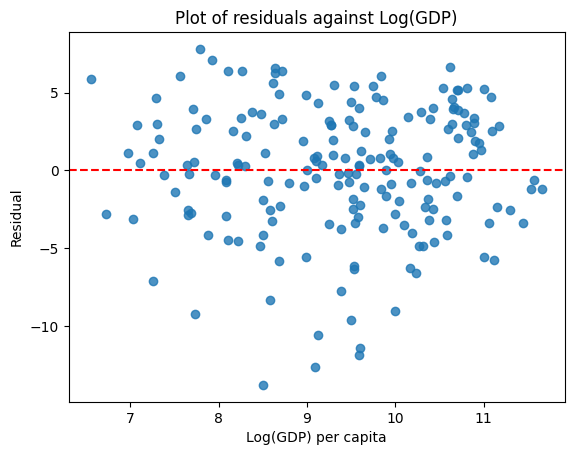

In [ ]:
# Plots of residuals against Log(GDP)

sp = sns.regplot(x = df['log_GDP'],      # continuous explanatory variable(log_GDP)
                 y=result_simple.resid,  # residuals
                 fit_reg=False)          # without regression model relating the x and y variables

sp.set(xlabel='Log(GDP) per capita',                # adding label on the x-axis
       ylabel='Residual',                           # adding label on the y-axis
       title='Plot of residuals against Log(GDP)')  # adding title

plt.axhline(y=0,ls="--",color="red")  # adding the line with y=0
plt.show()  # show the residuals plot

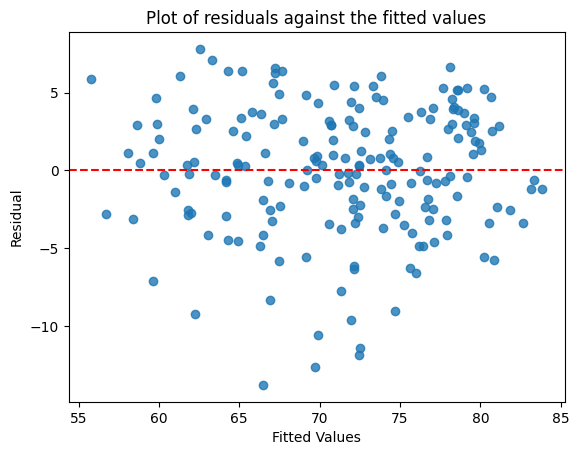

In [ ]:
# Plots of residuals against the fitted values

sp = sns.regplot(x=result_simple.fittedvalues,  # fitted values
                 y=result_simple.resid,         # residuals
                 fit_reg=False)                 # without regression model relating the x and y variables

sp.set(xlabel='Fitted Values',                               # adding label on the x-axis
       ylabel='Residual',                                    # adding label on the y-axis
       title='Plot of residuals against the fitted values')  # adding title

plt.axhline(y=0,ls="--",color="red")  # adding the line with y=0
plt.show()  # show the residuals plot

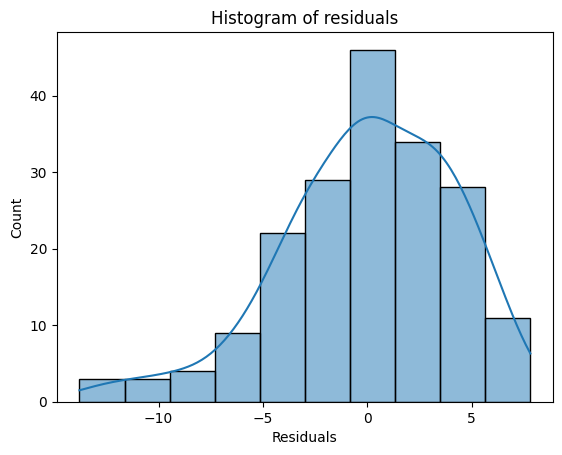

In [ ]:
# Plot histograms of the residuals

sp=sns.histplot(x=result_simple.resid,  # residuals
                bins=10,                # set the number of bins as 10
                kde=True)               # compute a kernel density estimate to smooth the distribution and show on the plot

sp.set(xlabel='Residuals',              # adding label on the x-axis
       title='Histogram of residuals')  # adding title

plt.show()  # show histograms of the residuals

* Residuals mean and variance

The scatter plot of residuals from the Simple Linear Regression reveals that the residuals are randomly dispersed, exhibiting no systematic patterns. Additionally, from the plot of the residuals against the fitted values, it shows the scale of variability in residuals is nearly constant across all values of the explanatory variable, indicating that the majority of residuals maintain constant variance across all levels of the fitted values.

* Residuals distribution

However, the histogram of residuals shows a slight left-skew. Despite this skewness, the histogram appears to be relatively symmetrical and bell-shaped. From the linear regression plot, some points on the bottom right are quite far from the fitted line.

### Model Inferences - Variable Selection

Regression Coefficient: P-values & Confidence Interval

In [ ]:
# Creating regression result tables

# converting the result to be html table
regression_table_html = result_simple.summary().tables[1].as_html()

# read the html table and rename columns
regression_table_html = pd.read_html(regression_table_html, header=0, index_col=0)[0]
regression_table_html = regression_table_html.rename(columns={"[0.025": "0.025",
                                                              "0.975]": "0.975"})

In [ ]:
display(regression_table_html)

,coef,std err,t,P>|t|,0.025,0.975
Intercept,19.7013,2.462,8.001,0.0,14.844,24.559
log_GDP,5.5010,0.260,21.148,0.0,4.988,6.014


Furthermore, upon observation, it is noted that all p-values are less than the 5% significance level, and the confidence intervals for the regression coefficients do not encompass zero. Therefore, there is sufficient evidence to assert the statistical significance of the regression coefficients.

# **Model Comparison**

There are several objective criteria which can be used for comparing various models applied to the same dataset.
1. R-squared Adjusted: The proportion of the total variation from the outcome variable that can be explained by the model. The higher the better the model.
2. AIC: Explaining the trade-off between on how well the model fit the data (assesed by the likelihood function) and the complexity (number of parameters). The lower the better the model.
3. BIC: Similar intuition with AIC, but it imposes a higher penalty to more complex models. The lower the better the model.

In this case, the model which can maximize R-squared Adjusted and minimize AIC and BIC will be selected.



In [ ]:
# Creating dictionary for AIC, BIC, R-squared, and R-squared Adj
data = {
    'Model': ['Parallel',
              'Simple',
              'Interaction'],
    'Log Transformation' : ['yes','yes','yes'],
    'AIC': [np.round(result_parallel_log.aic,4),
            np.round(result_simple.aic,4),
            np.round(result_interaction_log.aic,4)],
    'BIC': [np.round(result_parallel_log.bic,4),
            np.round(result_simple.bic,4),
            np.round(result_interaction_log.bic,4)],
    'Rsquared-adj' :[np.round(result_parallel_log.rsquared_adj,4),
                     np.round(result_simple.rsquared_adj,4),
                     np.round(result_interaction_log.rsquared_adj,4)]
  }

# Convert Dict to DataFrame
objective_criteria_summary = pd.DataFrame(data)

In [ ]:
objective_criteria_summary

,Model,Log Transformation,AIC,BIC,Rsquared-adj
0,Parallel,yes,1050.1156,1069.5661,0.7510
1,Simple,yes,1079.1234,1085.6069,0.7036
2,Interaction,yes,1051.2827,1083.7002,0.7544


Comparing AIC, BIC, and Rsquared-adj

* The parallel model with log-transformed GDP has the lowest AIC and BIC. Furthermore, it also has a relatively high Rsquared Adjusted compared to other models (second highest). Although it is the second highest, it is only 0.0035 away from the highest value.
* Based on some investigations on regression coefficients, there are only two models that can give significant results: Parallel and Simple linear regression model. Furthermore, the parallel one is able to give a better AIC, BIC, and Rsquared-adj.

Finally, the `parallel model with log-transformed GDP` is chosen to become the most suitable model to explain relationship between Life Expectancy, log_GDP, and Continent. It has R-squared adjusted value of 0.751, signifying that 75.1% of the variability in the dependent variable is explained by the model, while the remaining 24.9% is attributed to residuals. This implies a substantial level of model fit.

# **Conclusion**
In summary, after comparing the OLS regression results and residual plots, we find that the parallel slope model with log data transformation is the most appropriate. This model effectively captures the linear relationship between life expectancy, GDP, and continent. The interaction model exhibit notable flaws, such as P-values below the 5% confidence level and confidence intervals containing zero.

Furthermore, the simple linear regression model, which does not consider the continent as a categorical variable, shows a more pronounced left-skewness in the residual histogram compared to the parallel slope model with log data transformation. Therefore, the latter is considered more fitting.

The R-squared, coefficients of predictors, p-values, confidence intervals, and residual plots of the parallel slope model with log data transformation provide sufficient evidence to support a significant linear relationship between life expectancy and GDP, taking into account the continent as a categorical variable.

However, it is important to note that there are some outliers in the residuals, and the histogram does not exhibit a perfect normal distribution. Further optimization of the model may be necessary. Despite these issues, the histogram is relatively symmetrical and bell-shaped, suggesting that the assumption of normally distributed random errors is valid in this context.

---

---

# **Appendix**

## Sanity Checking

In this case, the sanity check is conducted to ensure that if the log transformation for GDP is not performed, then we are not able to get the suitable linear regression model.

Here are the summary for the exploration:
* The interaction model without log data transformation shows coefficients for continuous predictors close to zero, indicating insufficient evidence for a linear relationship between life expectancy, GDP, and continent.
* The parallel slope model without log data transformation also exhibits coefficients for continuous predictors close to zero, with confidence intervals including zero.

Something that can be learned from here is that the regression coefficients will have a very small magnitude (e.g., CI will contain values very close to zero) because the scale of the independent variable is much larger than the dependent variable. However, it does mean in reality there is no significant relationship. In conclusion, the log-transformed is needed for the modeling process.

### Interaction Model (Before Log Transformation)


*   Life Expectancy as the outcome variable (`life_exp`)
*   GDP as the continuous explanatory variable (`log_GDP`)
*   Continent as the categorical explanatory variable (`continent`)

In [ ]:
model_interaction = ols("life_exp ~ GDP * continent", # build the interaction regression lines model
                        data=df)                      # DataFrame name

result_interaction = model_interaction.fit()          # fit the model

print(result_interaction.summary())                   # show the regression results

                            OLS Regression Results                            
Dep. Variable:               life_exp   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     57.41
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           3.92e-48
Time:                        12:31:24   Log-Likelihood:                -524.69
No. Observations:                 189   AIC:                             1069.
Df Residuals:                     179   BIC:                             1102.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

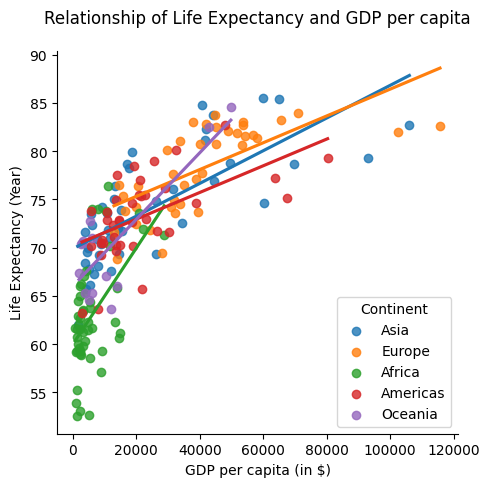

In [ ]:
# Visualization of Regression Lines

sp = sns.lmplot(data = df,        # DataFrame name
                x = 'GDP',        # continuous explanatory variable (GDP)
                y = 'life_exp',   # outcome variable (Life Expectancy)
                hue='continent',  # produce points with different colors by categorical explanatory variable (continent)
                fit_reg = True,   # estimate and plot a regression model relating the x and y variables
                ci = False,       # turn off the confidence interval for the regression estimate
                legend = False)   # turn off the legend

sp.set(xlabel='GDP per capita (in $)',   # adding label on the x-axis
       ylabel='Life Expectancy (Year)')  # adding label on the y-axis

plt.title("Relationship of Life Expectancy and GDP per capita", y=1.05)  # adding title
plt.legend(title="Continent", loc="lower right")                         # customizing legend position

sp.fig.tight_layout()  # avoid the overlapping text
plt.show()             # show the scatter plot


The OLS regression results of interaction model (without log transformation) indicate an R-squared value of 0.743, signifying that 74.3% of the variability in the dependent variable is explained by the model, while the remaining 25.7% is attributed to residuals. This is considered a relatively high level of model fit.

However, upon examination, it is observed that the coefficients for the independent variable GDP and the interactions between continents and GDP are close to zero. This suggests that the impact of this independent variable on the dependent variable is relatively weak or negligible, indicating a modest influence on the dependent variable. In this case, one of the causes is the scale of GDP's values - independent variable are much larger than Life Expectancy - dependent variable.

Furthermore, the confidence intervals for the GDP variable and its interaction with the continent variable indicate that these coefficients are not statistically significant. The confidence intervals encompass zero. Therefore, there is insufficient evidence to assert the significance of the regression coefficients associated with GDP.

#### Assessing Model Fit

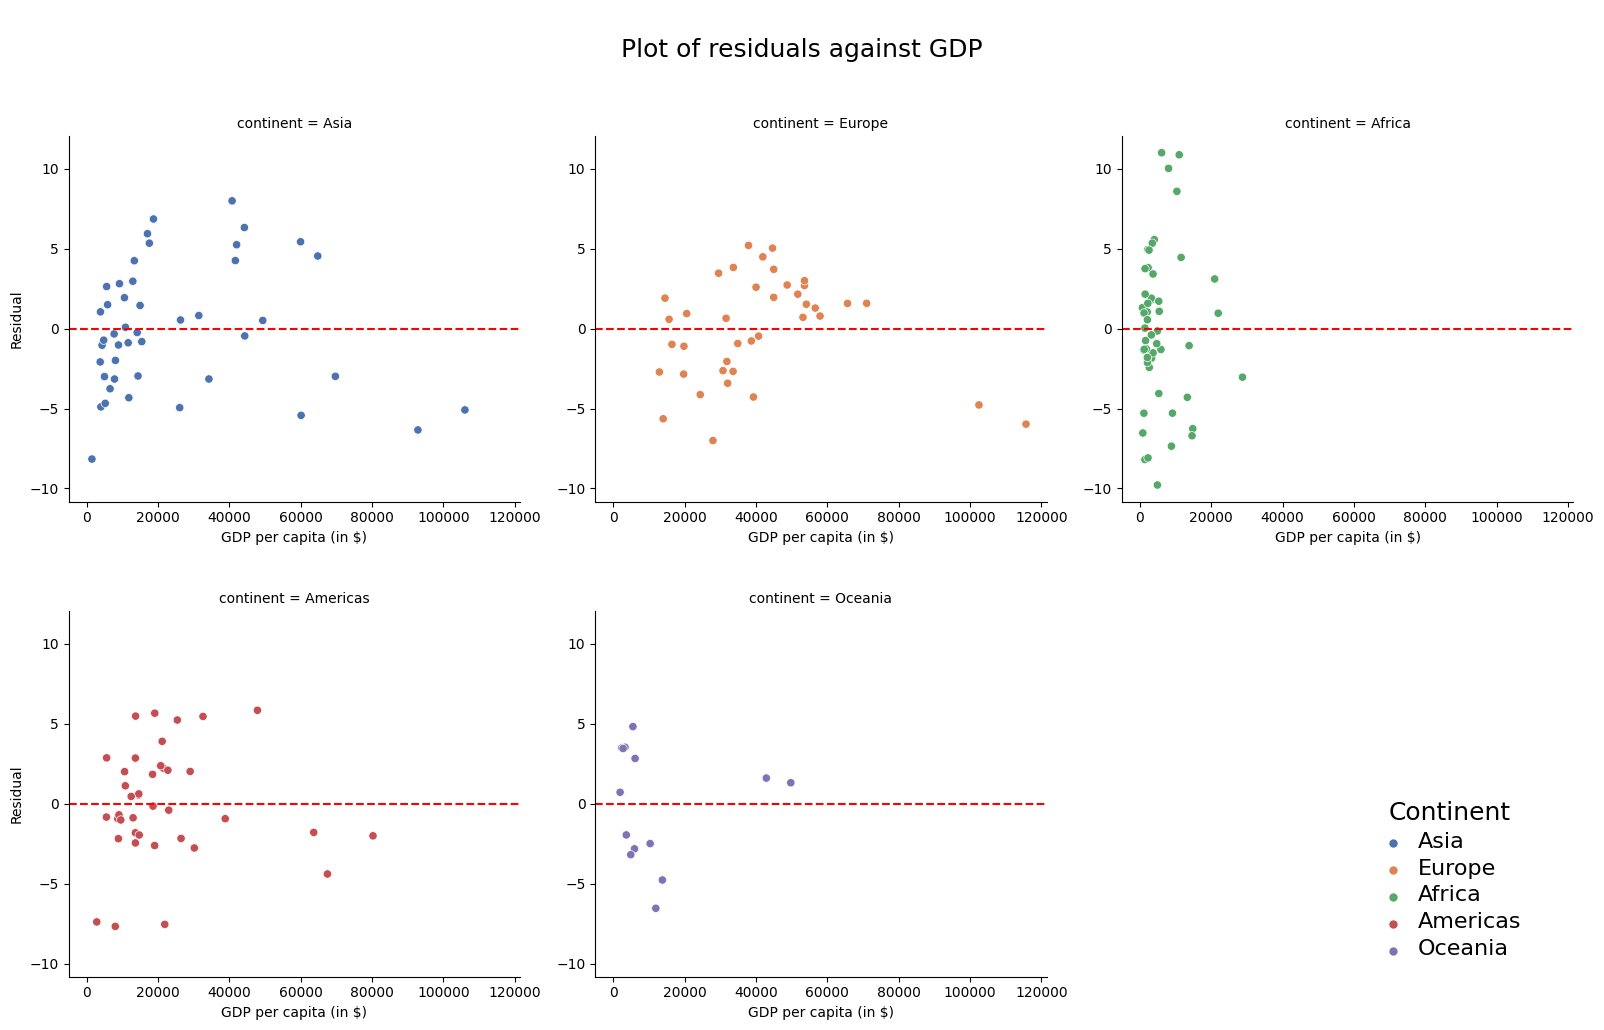

In [ ]:
# Validate if the residuals have zero mean and constant variance or not

# Plots of residuals against GDP
sp = sns.relplot(x = df['GDP'],                 # continuous explanatory variable (GDP)
                 y = result_interaction.resid,  # residuals
                 hue = df["continent"],         # produce points with different colors by categorical explanatory variable (continent)
                 col = df["continent"],         # define subsets to plot on different continents
                 col_wrap = 3,                  # “Wrap” the column variable by width of 2, so that the column facets span multiple rows
                 palette = 'deep')              # set the color to use for different levels

sp.set(xlabel='GDP per capita (in $)', # adding label on the x-axis
       ylabel='Residual')              # adding label on the y-axis

# Customize the legend
sp.legend.set_title("Continent")            # adjust legend title
sp.legend.set_bbox_to_anchor([0.95, 0.15])  # adjust the legend position
sp.legend.get_title().set_fontsize(18)      # adjust the font size for the legend title
for text in sp.legend.texts:                # adjust the font size for the legend's list
  text.set_fontsize(16)

#Adding horizontal line at y= 0
for ax in sp.axes.flat:
    ax.axhline(y=0, ls="--", color="red")             # horizontal line
    ax.set_xlabel(ax.get_xlabel(), visible=True)      # show x-axis title
    # ax.set_ylabel(ax.get_ylabel(), visible=True)
    ax.tick_params(labelbottom=True, labelleft=True)  # show x-axis number

# Adding a single title
plt.suptitle("\nPlot of residuals against GDP", y=1.025, fontsize=18)

sp.fig.tight_layout()             # avoid the overlapping text
plt.subplots_adjust(hspace=0.3)   # adjust space between plots
plt.show()                        # show the residuals plot

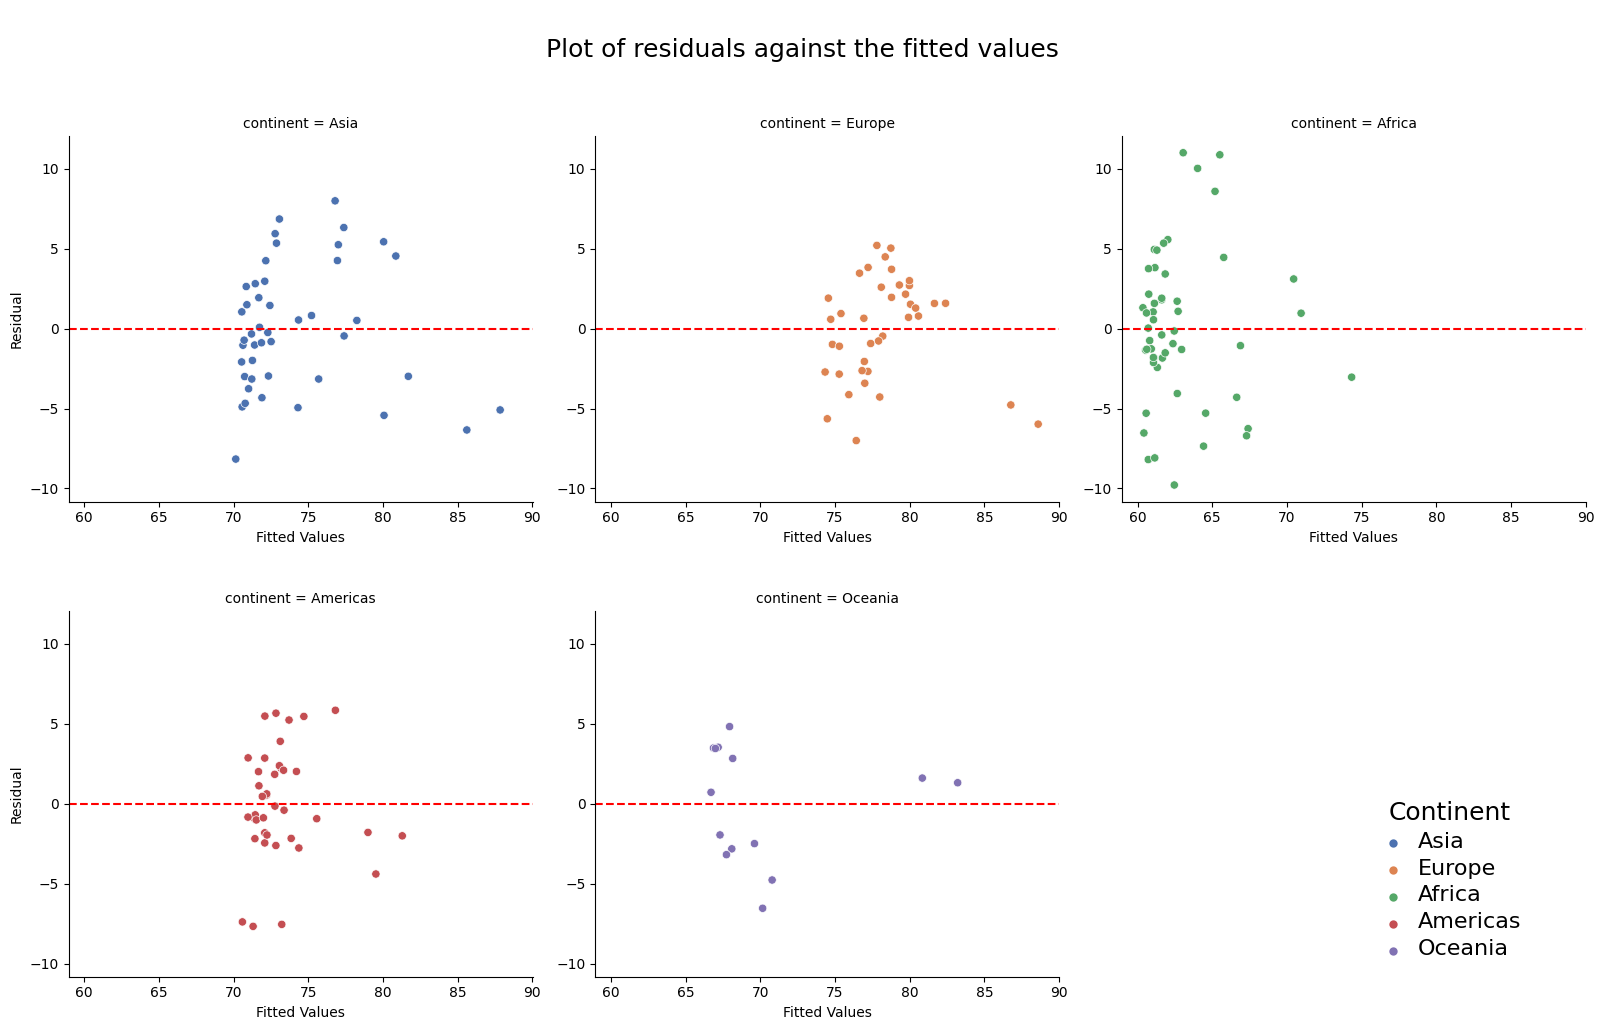

In [ ]:
# Validate if the residuals have zero mean and constant variance or not

# Plots of residuals against fitted values
sp = sns.relplot(x = result_interaction.fittedvalues,  # fitted values
                 y = result_interaction.resid,         # residuals
                 hue = df["continent"],                # produce points with different colors by categorical explanatory variable (continent)
                 col = df["continent"],                # define subsets to plot on different continents
                 col_wrap = 3,                         # “Wrap” the column variable by width of 2, so that the column facets span multiple rows
                 palette = 'deep')                     # set the color to use for different levels

sp.set(xlabel='Fitted Values', # adding label on the x-axis
       ylabel='Residual')      # adding label on the y-axis

# Customize the legend
sp.legend.set_title("Continent")            # adjust legend title
sp.legend.set_bbox_to_anchor([0.95, 0.15])  # adjust the legend position
sp.legend.get_title().set_fontsize(18)      # adjust the font size for the legend title
for text in sp.legend.texts:                # adjust the font size for the legend's list
  text.set_fontsize(16)

#Adding horizontal line at y= 0
for ax in sp.axes.flat:
    ax.axhline(y=0, ls="--", color="red")             # horizontal line
    ax.set_xlabel(ax.get_xlabel(), visible=True)      # show x-axis title
    # ax.set_ylabel(ax.get_ylabel(), visible=True)
    ax.tick_params(labelbottom=True, labelleft=True)  # show x-axis number

# Adding a single title
plt.suptitle("\nPlot of residuals against the fitted values", y=1.025, fontsize=18)

sp.fig.tight_layout()             # avoid the overlapping text
plt.subplots_adjust(hspace=0.3)   # adjust space between plots
plt.show()                        # show the residuals plot

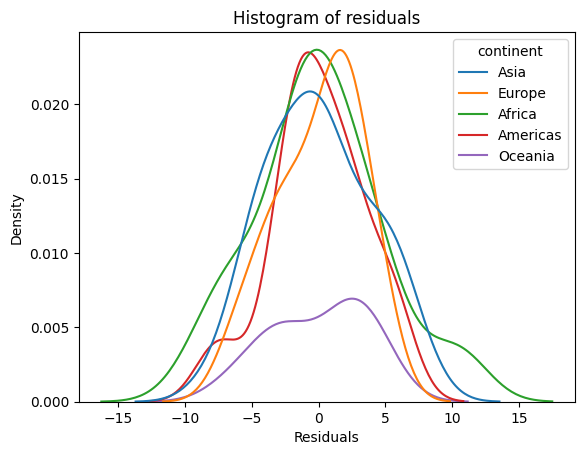

In [ ]:
# Validate if the residuals are normally distributed or not

# Plot KDE of the residuals grouped by continent
sp=sns.kdeplot(x=result_interaction.resid, # residuals
               hue=df["continent"])        # produce points with different colors by categorical explanatory variable (continent

sp.set(xlabel='Residuals',              # adding label on the x-axis
       title='Histogram of residuals')  # adding title

plt.show() # show histograms of the residuals

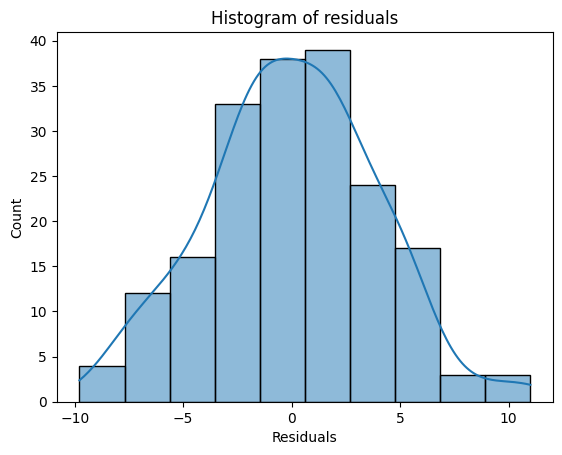

In [ ]:
# Validate if the residuals are normally distributed or not

# Plot histograms of the residuals
sp=sns.histplot(x=result_interaction.resid,  # residuals
                kde=True,                    # compute a kernel density estimate to smooth the distribution and show on the plot
                bins=10)                     # set the number of bins as 10

sp.set(xlabel='Residuals',              # adding label on the x-axis
       title='Histogram of residuals')  # adding title

plt.show()  # show histograms of the residuals

The scatter plot of residuals from the Interaction Model (Without Log Transformation) indicates that the residuals are randomly dispersed, showing no systematic patterns. Additionally, from the plot of the residuals against the fitted values, it shows the majority of residuals exhibit constant variance across all levels of the fitted values, except for a few outliers on the right side of the graph.

Analyzing the histograms of residuals for each continent, it is observed that residuals for the Americas, Asia, and Africa follow a roughly normal distribution. Oceania and Europe, however, display a slight left-skew. Nonetheless, the overall histogram of residuals presents an approximately bell-shaped curve centered around zero. This suggests that the residuals have an average value of zero and are broadly distributed according to a normal distribution.

### Parallel Model (Before Log Transformation)

*   Life Expectancy as the outcome variable (`life_exp`)
*   GDP as the continuous explanatory variable (`log_GDP`)
*   Continent as the categorical explanatory variable (`continent`)

In [ ]:
model_parallel = ols("life_exp ~ GDP + continent",  # build the parallel regression lines model
                     data=df)                       # DataFrame name

result_parallel=model_parallel.fit()                # fit the model

print(result_parallel.summary())                    # show the regression results

                            OLS Regression Results                            
Dep. Variable:               life_exp   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     91.41
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           7.18e-48
Time:                        12:31:31   Log-Likelihood:                -534.65
No. Observations:                 189   AIC:                             1081.
Df Residuals:                     183   BIC:                             1101.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                61.87

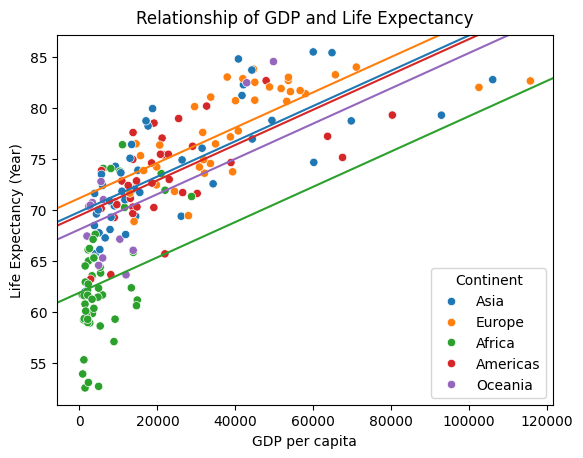

In [ ]:
# Visualization of Regression Lines

sl = result_parallel.params

# Intercept and Slope for each continent
africa_intercept = sl["Intercept"]
americas_intercept = sl["Intercept"] + sl["continent[T.Americas]"]
asia_intercept = sl["Intercept"] + sl["continent[T.Asia]"]
europe_intercept = sl["Intercept"] + sl["continent[T.Europe]"]
oceania_intercept = sl["Intercept"] + sl["continent[T.Oceania]"]

# Scatter plot
sp=sns.scatterplot(data = df,         # dataframe name
                   x = 'GDP',         # continuous explanatory variable(GDP)
                   y = 'life_exp',    # outcome variable(life_exp)
                   hue='continent')   # produce points with different colors by categorical explanatory variable(continent)

sp.set(xlabel='GDP per capita',         # adding label on the x-axis
       ylabel='Life Expectancy (Year)') # adding label on the y-axis

plt.title("Relationship of GDP and Life Expectancy", y=1.01) # adding title
plt.legend(title="Continent", loc="lower right")             # customizing the legend position

# Regression Line for each continent
plt.axline(xy1=(0,africa_intercept), slope=sl["GDP"], color="tab:green")
plt.axline(xy1=(0,americas_intercept), slope=sl["GDP"], color="tab:red")
plt.axline(xy1=(0,asia_intercept), slope=sl["GDP"], color="tab:blue")
plt.axline(xy1=(0,europe_intercept), slope=sl["GDP"], color="tab:orange")
plt.axline(xy1=(0,oceania_intercept), slope=sl["GDP"], color="tab:purple")

The OLS regression results of parallel model (without log transformation) indicate an R-squared value of 0.714, signifying that 71.4% of the variability in the dependent variable is explained by the model, while the remaining 28.6% is attributed to residuals. This implies a substantial level of model fit.

Moreover, upon observation, it is noted that all p-values are less than the 5% significance level. This indicates that the regression coefficients are statistically significant. However, it is observed that the coefficient for the independent variable GDP is close to zero, and its confidence interval encompasses zero. Consequently, there is insufficient evidence to assert the statistical significance of the regression coefficient for GDP.

#### Assessing Model Fit

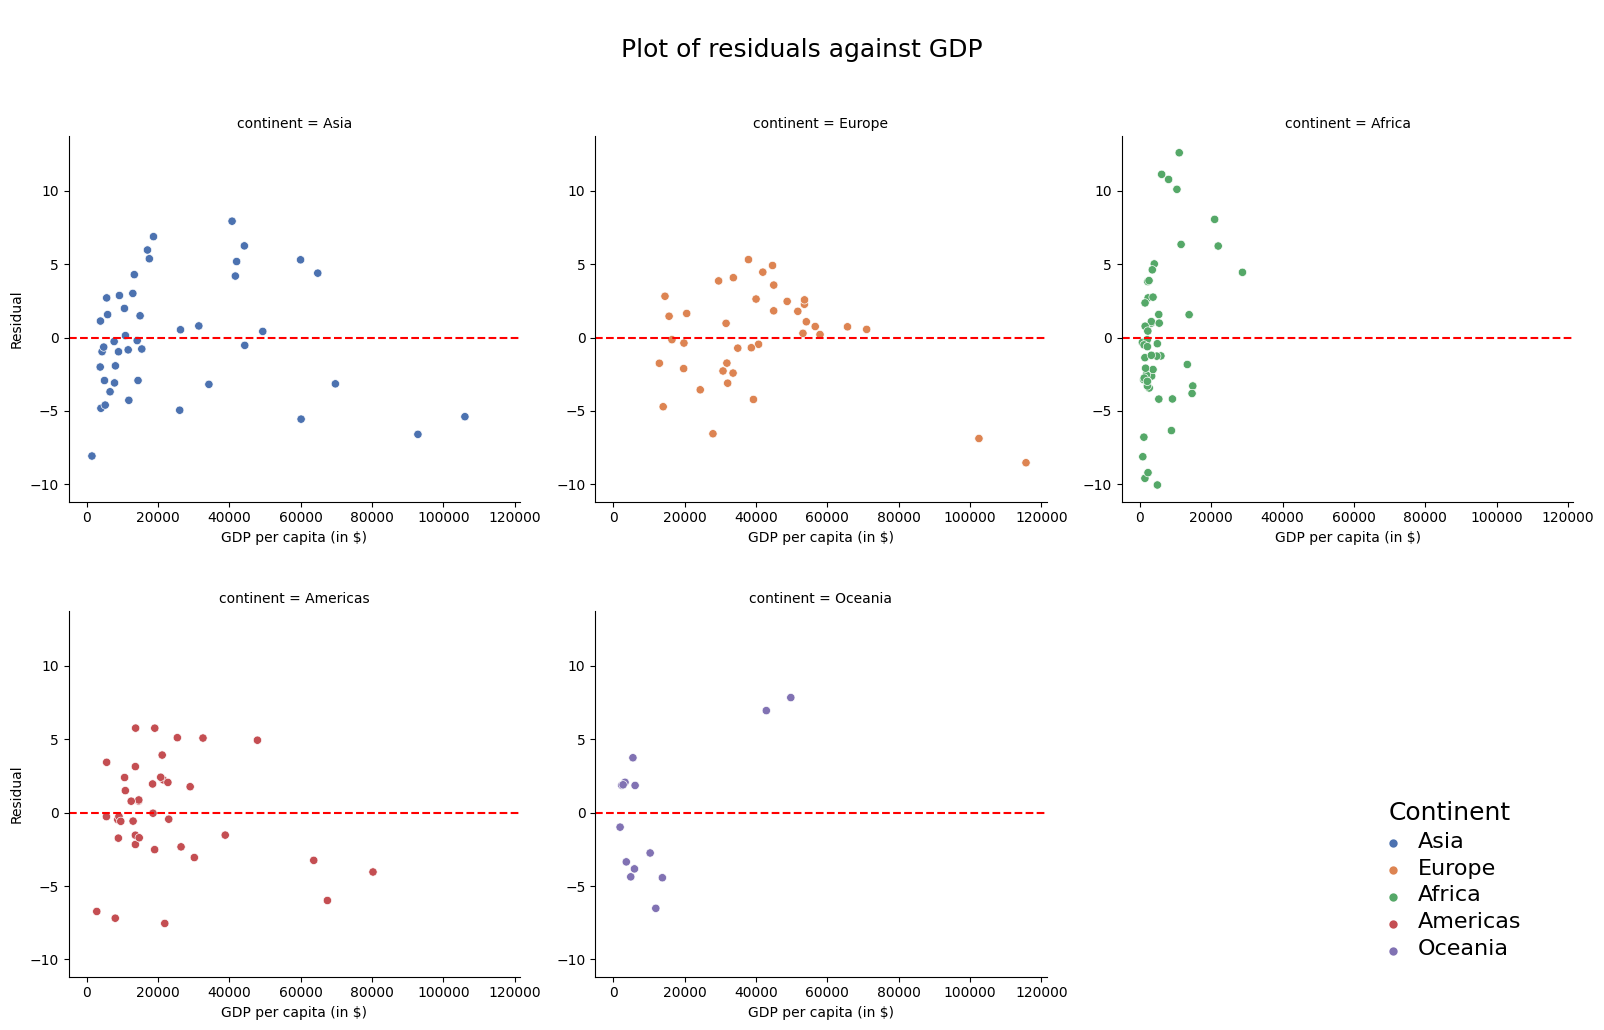

In [ ]:
# Validate if the residuals have zero mean and constant variance or not

# Plots of residuals against GDP
sp = sns.relplot(x = df['GDP'],                 # continuous explanatory variable (GDP)
                 y = result_parallel.resid,     # residuals
                 hue = df["continent"],         # produce points with different colors by categorical explanatory variable (continent)
                 col = df["continent"],         # define subsets to plot on different continents
                 col_wrap = 3,                  # “Wrap” the column variable by width of 2, so that the column facets span multiple rows
                 palette = 'deep')              # set the color to use for different levels

sp.set(xlabel='GDP per capita (in $)', # adding label on the x-axis
       ylabel='Residual')              # adding label on the y-axis

# Customize the legend
sp.legend.set_title("Continent")            # adjust legend title
sp.legend.set_bbox_to_anchor([0.95, 0.15])  # adjust the legend position
sp.legend.get_title().set_fontsize(18)      # adjust the font size for the legend title
for text in sp.legend.texts:                # adjust the font size for the legend's list
  text.set_fontsize(16)

#Adding horizontal line at y= 0
for ax in sp.axes.flat:
    ax.axhline(y=0, ls="--", color="red")             # horizontal line
    ax.set_xlabel(ax.get_xlabel(), visible=True)      # show x-axis title
    # ax.set_ylabel(ax.get_ylabel(), visible=True)
    ax.tick_params(labelbottom=True, labelleft=True)  # show x-axis number

# Adding a single title
plt.suptitle("\nPlot of residuals against GDP", y=1.025, fontsize=18)

sp.fig.tight_layout()             # avoid the overlapping text
plt.subplots_adjust(hspace=0.3)   # adjust space between plots
plt.show()                        # show the residuals plot

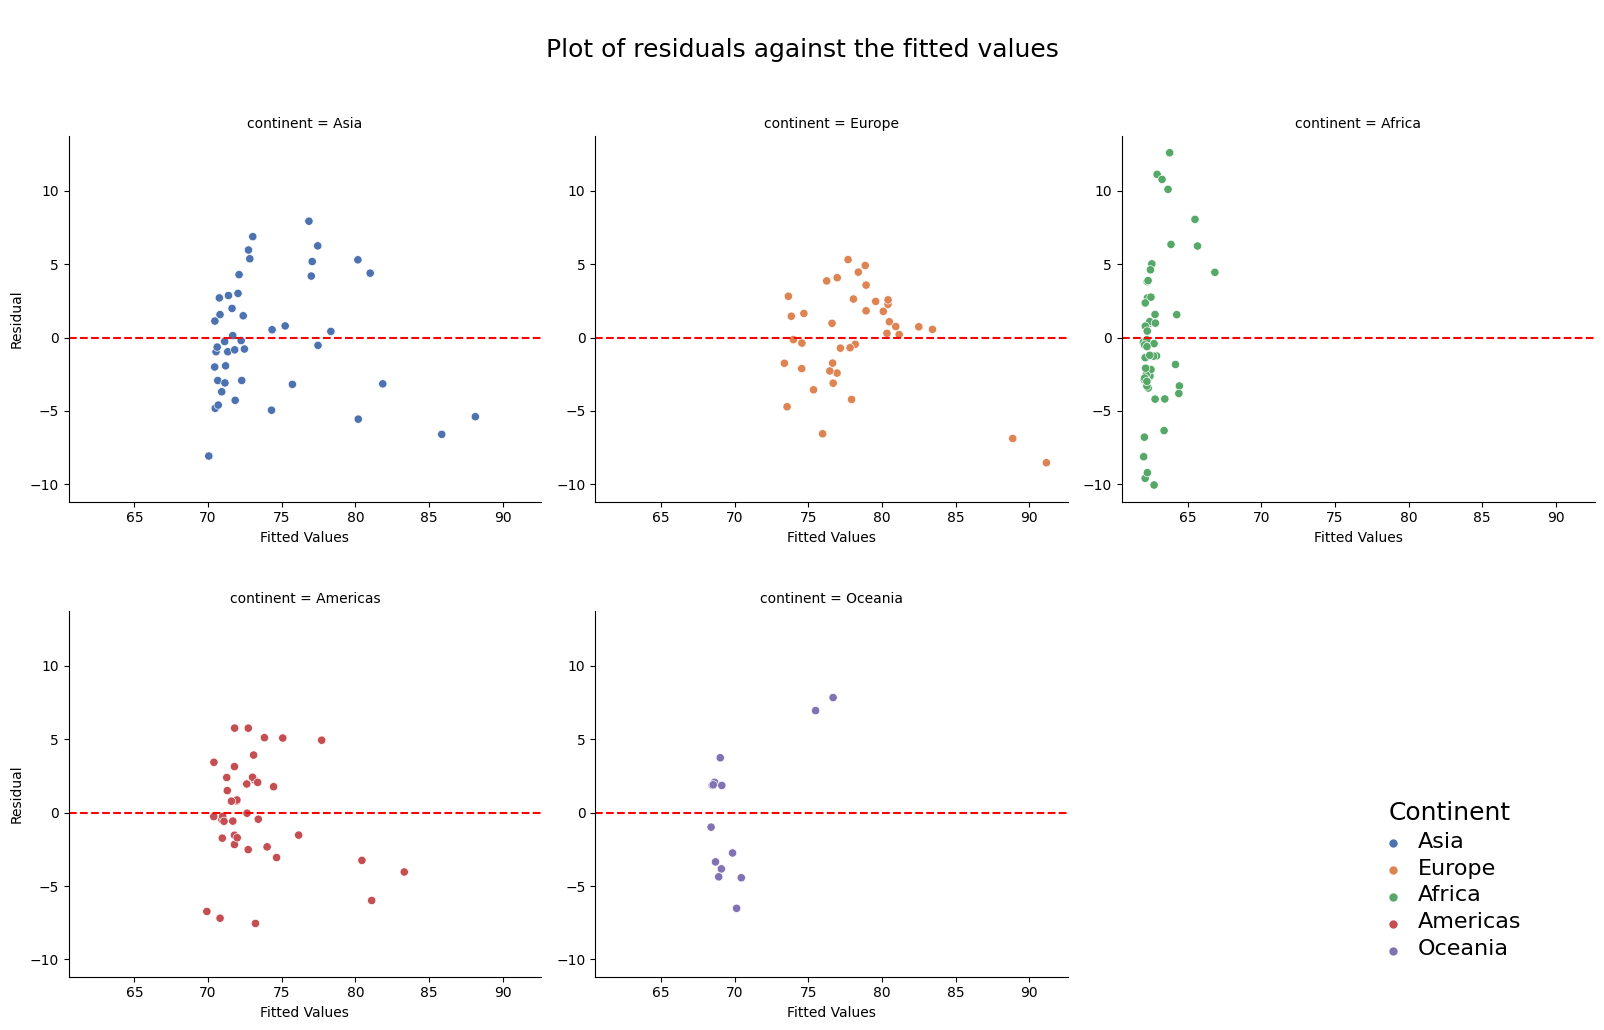

In [ ]:
# Validate if the residuals have zero mean and constant variance or not

# Plots of residuals against fitted values
sp = sns.relplot(x = result_parallel.fittedvalues,  # fitted values
                 y = result_parallel.resid,         # residuals
                 hue = df["continent"],                # produce points with different colors by categorical explanatory variable (continent)
                 col = df["continent"],                # define subsets to plot on different continents
                 col_wrap = 3,                         # “Wrap” the column variable by width of 2, so that the column facets span multiple rows
                 palette = 'deep')                     # set the color to use for different levels

sp.set(xlabel='Fitted Values', # adding label on the x-axis
       ylabel='Residual')      # adding label on the y-axis

# Customize the legend
sp.legend.set_title("Continent")            # adjust legend title
sp.legend.set_bbox_to_anchor([0.95, 0.15])  # adjust the legend position
sp.legend.get_title().set_fontsize(18)      # adjust the font size for the legend title
for text in sp.legend.texts:                # adjust the font size for the legend's list
  text.set_fontsize(16)

#Adding horizontal line at y= 0
for ax in sp.axes.flat:
    ax.axhline(y=0, ls="--", color="red")             # horizontal line
    ax.set_xlabel(ax.get_xlabel(), visible=True)      # show x-axis title
    # ax.set_ylabel(ax.get_ylabel(), visible=True)
    ax.tick_params(labelbottom=True, labelleft=True)  # show x-axis number

# Adding a single title
plt.suptitle("\nPlot of residuals against the fitted values", y=1.025, fontsize=18)

sp.fig.tight_layout()             # avoid the overlapping text
plt.subplots_adjust(hspace=0.3)   # adjust space between plots
plt.show()                        # show the residuals plot

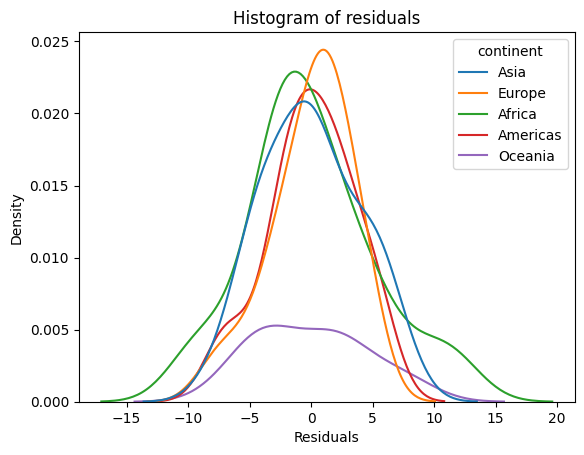

In [ ]:
# Validate if the residuals are normally distributed or not

# Plot KDE of the residuals grouped by continent
sp=sns.kdeplot(x=result_parallel.resid, # residuals
               hue=df["continent"])        # produce points with different colors by categorical explanatory variable (continent

sp.set(xlabel='Residuals',              # adding label on the x-axis
       title='Histogram of residuals')  # adding title

plt.show() # show histograms of the residuals

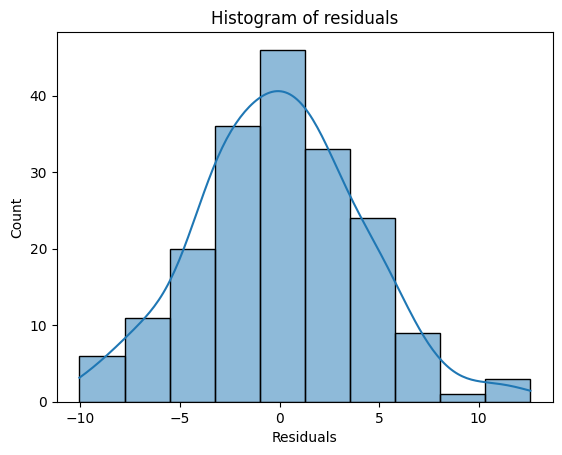

In [ ]:
# Validate if the residuals are normally distributed or not

# Plot histograms of the residuals
sp=sns.histplot(x=result_parallel.resid,  # residuals
                bins=10,                  # set the number of bins as 10
                kde=True)                 # compute a kernel density estimate to smooth the distribution and display it on the plot

sp.set(xlabel='Residuals',              # adding label on the x-axis
       title='Histogram of residuals')  # adding title

plt.show()  # show histograms of the residuals

The scatter plot of residuals from the Parallel Model (Without Log Transformation) indicates that the residuals are randomly dispersed, showing no systematic patterns. Additionally, from the plot of the residuals against the fitted values, it shows the majority of residuals exhibit constant variance across all levels of the fitted values, but there are a few outliers on the right side of the plot.

Analyzing the histograms of residuals for each continent, it is observed that residuals for the Americas, Asia, and Africa follow a roughly normal distribution. However, Europe and Oceania shows a slight left-skew. Nonetheless, the overall histogram of residuals presents an approximately bell-shaped curve centered around zero. This suggests that the residuals have an average value of zero and are broadly distributed according to a normal distribution.

---

## Saving Tables

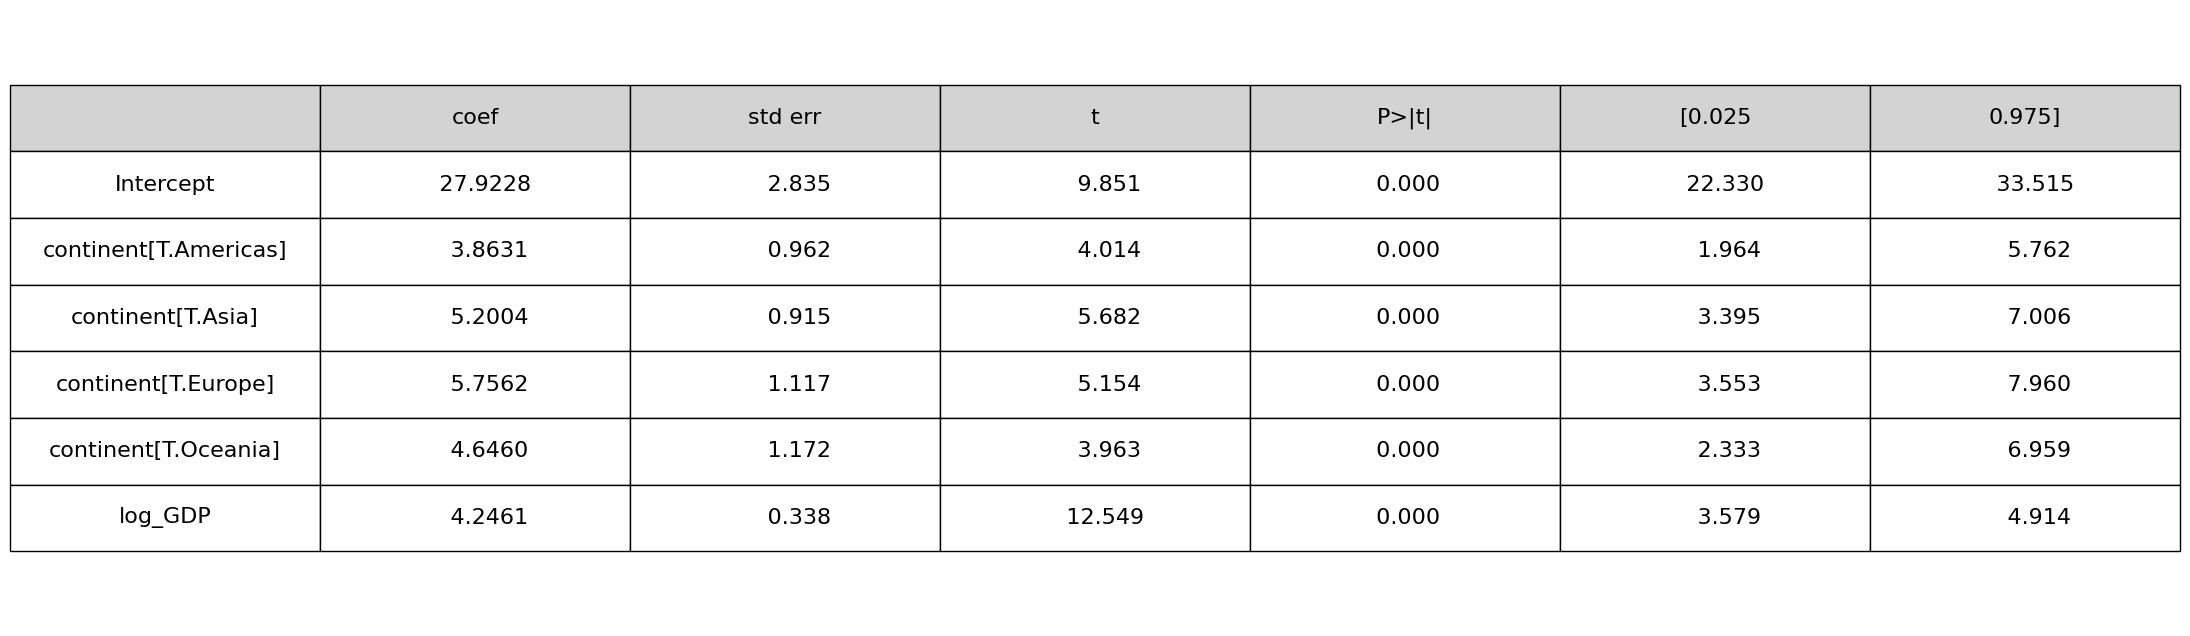

In [ ]:
# Generate the regression table
regression_table_html = result_parallel_log.summary().tables[1]
regression_table_html

# Convert the table to a list of lists
table_data = []
for row in regression_table_html.data:
    table_data.append(list(row))

# Extract column labels directly from the table
col_labels = list(regression_table_html[0])   # create a list
plt.figure(figsize=(10, 8))                   # Adjust the figure size
plt.axis('off')

# create a table in matplotlib
table = plt.table(cellText=table_data[1:],
                  colLabels=col_labels,
                  colColours=['lightgray','lightgray','lightgray','lightgray','lightgray','lightgray','lightgray'],
                  loc='center',
                  cellLoc='center',
                  colLoc='center',
                  colWidths=[0.1,0.1,0.1,0.1,0.1,0.1,0.1],
                  edges='closed')
table.scale(4, 4)         # adjust the size of the table
table.set_fontsize(20)    # adjust the fontsize

# plt.title('Regression Summary Table', fontsize=20, y=0.90)  # add a title

# saving the plot to be png
plt.savefig('figure_table_1.png', bbox_inches='tight')

plt.show()

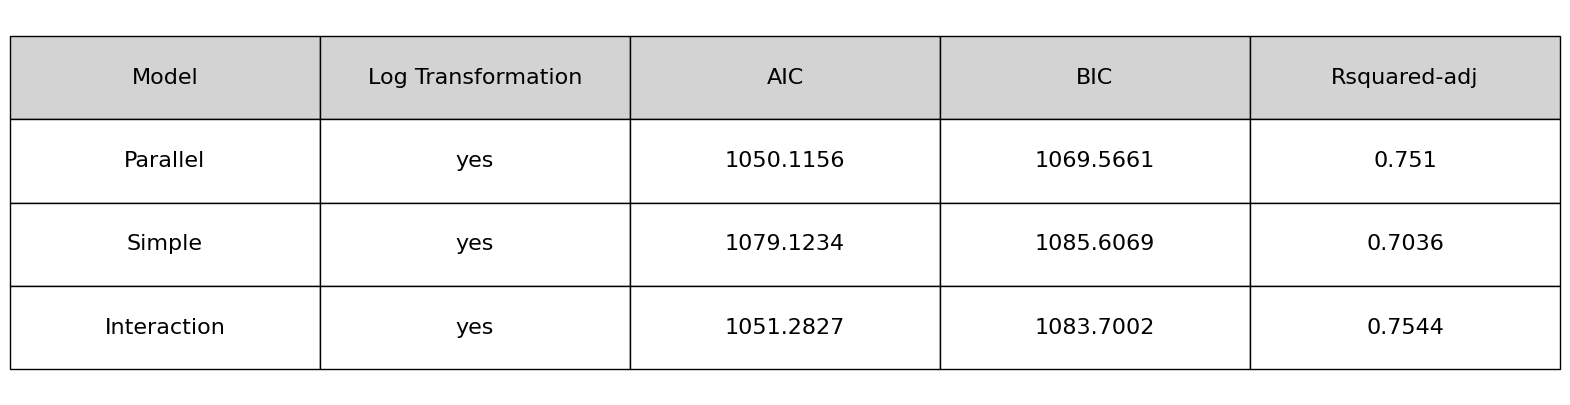

In [ ]:
# Save DataFrame as an image

plt.figure(figsize=(8,5)) # Adjust the figure size
plt.axis('off')

# create a table in matplotlib
table = plt.table(cellText=objective_criteria_summary.values,
                  colLabels=objective_criteria_summary.columns,
                  colColours=['lightgray','lightgray','lightgray','lightgray','lightgray'],
                  loc='center',
                  cellLoc='center',
                  colLoc='center',
                  colWidths=[0.1,0.1,0.1,0.1,0.1,0.1,0.1],
                  edges='closed')
table.scale(5,5)     # adjust the size of the table
table.set_fontsize(16)    # adjust the fontsize

# plt.title('Model Comparison Table', fontsize=15, y=0.85)  # add a title

# saving the plot to be png
plt.savefig('figure_table_2.png', bbox_inches='tight')

plt.show()